<h1><center>Auto1 Data Science Challenge</center></h1>

## Agenda

* Business Understanding
* Data Understanding
* Data Preparation
* Exploratory Data Analysis
* Building a Random Forest Model
* Evaluation

### Business Understanding


A leading car trading company which connects both sellers and buyers through a online trading platform wants to analyze their data to improve its business. 

#### Problem Statement

The objectives is to :
* Building a regression model to predict the price of a car given the car features amd insurance related features.
* Building a regression model to predict the normalized-losses of a car based on the car faetures.

### Data Understanding

In [2]:
# Importing libraries

import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from fancyimpute import KNN
import itertools

import graphviz
import shap

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [65]:
# Reading the data 
car_Data = pd.read_csv('Auto1-DS-TestData.csv')

In [19]:
car_Data

symboling normalized-losses           make fuel-type aspiration  \
0    3          NaN               alfa-romero    gas       std         
1    3          NaN               alfa-romero    gas       std         
2    1          NaN               alfa-romero    gas       std         
3    2          164               audi           gas       std         
4    2          164               audi           gas       std         
5    2          NaN               audi           gas       std         
6    1          158               audi           gas       std         
7    1          NaN               audi           gas       std         
8    1          158               audi           gas       turbo       
9    0          NaN               audi           gas       turbo       
10   2          192               bmw            gas       std         
11   0          192               bmw            gas       std         
12   0          188               bmw            gas       std         
13   0          188               bmw            gas       std         
14   1          NaN               bmw            gas       std         
15   0          NaN               bmw            gas       std         
16   0          NaN               bmw            gas       std         
17   0          NaN               bmw            gas       std         
18   2          121               chevrolet      gas       std         
19   1          98                chevrolet      gas       std         
20   0          81                chevrolet      gas       std         
21   1          118               dodge          gas       std         
22   1          118               dodge          gas       std         
23   1          118               dodge          gas       turbo       
24   1          148               dodge          gas       std         
25   1          148               dodge          gas       std         
26   1          148               dodge          gas       std         
27   1          148               dodge          gas       turbo       
28  -1          110               dodge          gas       std         
29   3          145               dodge          gas       turbo       
30   2          137               honda          gas       std         
31   2          137               honda          gas       std         
32   1          101               honda          gas       std         
33   1          101               honda          gas       std         
34   1          101               honda          gas       std         
35   0          110               honda          gas       std         
36   0          78                honda          gas       std         
37   0          106               honda          gas       std         
38   0          106               honda          gas       std         
39   0          85                honda          gas       std         
40   0          85                honda          gas       std         
41   0          85                honda          gas       std         
42   1          107               honda          gas       std         
43   0          NaN               isuzu          gas       std         
44   1          NaN               isuzu          gas       std         
45   0          NaN               isuzu          gas       std         
46   2          NaN               isuzu          gas       std         
47   0          145               jaguar         gas       std         
48   0          NaN               jaguar         gas       std         
49   0          NaN               jaguar         gas       std         
50   1          104               mazda          gas       std         
51   1          104               mazda          gas       std         
52   1          104               mazda          gas       std         
53   1          113               mazda          gas       std         
54   1          113               mazda      

In [5]:
car_Data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [14]:
car_Data.describe(include = 'all')

symboling normalized-losses    make fuel-type aspiration  \
count   205.000000  205               205     205       205         
unique NaN          52                22      2         2           
top    NaN          ?                 toyota  gas       std         
freq   NaN          41                32      185       168         
mean    0.834146    NaN               NaN     NaN       NaN         
std     1.245307    NaN               NaN     NaN       NaN         
min    -2.000000    NaN               NaN     NaN       NaN         
25%     0.000000    NaN               NaN     NaN       NaN         
50%     1.000000    NaN               NaN     NaN       NaN         
75%     2.000000    NaN               NaN     NaN       NaN         
max     3.000000    NaN               NaN     NaN       NaN         

       num-of-doors body-style drive-wheels engine-location  wheel-base  \
count   205          205        205          205             205.000000   
unique  3            5          3            2              NaN           
top     four         sedan      fwd          front          NaN           
freq    114          96         120          202            NaN           
mean    NaN          NaN        NaN          NaN             98.756585    
std     NaN          NaN        NaN          NaN             6.021776     
min     NaN          NaN        NaN          NaN             86.600000    
25%     NaN          NaN        NaN          NaN             94.500000    
50%     NaN          NaN        NaN          NaN             97.000000    
75%     NaN          NaN        NaN          NaN             102.400000   
max     NaN          NaN        NaN          NaN             120.900000   

            length       width      height  curb-weight engine-type  \
count   205.000000  205.000000  205.000000  205.000000   205          
unique NaN         NaN         NaN         NaN           7            
top    NaN         NaN         NaN         NaN           ohc          
freq   NaN         NaN         NaN         NaN           148          
mean    174.049268  65.907805   53.724878   2555.565854  NaN          
std     12.337289   2.145204    2.443522    520.680204   NaN          
min     141.100000  60.300000   47.800000   1488.000000  NaN          
25%     166.300000  64.100000   52.000000   2145.000000  NaN          
50%     173.200000  65.500000   54.100000   2414.000000  NaN          
75%     183.100000  66.900000   55.500000   2935.000000  NaN          
max     208.100000  72.300000   59.800000   4066.000000  NaN          

       num-of-cylinders  engine-size fuel-system  bore stroke  \
count   205              205.000000   205         205   205     
unique  7               NaN           8           39    37      
top     four            NaN           mpfi        3.62  3.40    
freq    159             NaN           94          23    20      
mean    NaN              126.907317   NaN         NaN   NaN     
std     NaN              41.642693    NaN         NaN   NaN     
min     NaN              61.000000    NaN         NaN   NaN     
25%     NaN              97.000000    NaN         NaN   NaN     
50%     NaN              120.000000   NaN         NaN   NaN     
75%     NaN              141.000000   NaN         NaN   NaN     
max     NaN              326.000000   NaN         NaN   NaN     

        compression-ratio horsepower peak-rpm    city-mpg  highway-mpg price  
count   205.000000         205        205      205.000000  205.000000   205   
unique NaN                 60         24      NaN         NaN           187   
top    NaN                 68         5500    NaN         NaN           ?     
freq   NaN                 19         37      NaN         NaN           4     
mean    10.142537          NaN        NaN      25.219512   30.751220    NaN   
std     3.972040           NaN        NaN      6.542142    6.886443     NaN   
min     7.000000           NaN        NaN      13.000000   16.000000    NaN   
25%     8.600

#### Attribute Information:
1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.



### Data Prepration

#### Preprocessing to be done :

1. Cleansing data 
2. Converting attributes to appropriate data type

Cleansing Data :
    
* Replacing '?' with nulls
* num-of-doors has an extra unique level ( need to replace )

In [66]:
# Replacing '?' with nulls#
car_Data = car_Data.replace('?', np.NaN)

In [6]:
# Checking for nulls
car_Data.isnull().sum()

symboling            0 
normalized-losses    41
make                 0 
fuel-type            0 
aspiration           0 
num-of-doors         2 
body-style           0 
drive-wheels         0 
engine-location      0 
wheel-base           0 
length               0 
width                0 
height               0 
curb-weight          0 
engine-type          0 
num-of-cylinders     0 
engine-size          0 
fuel-system          0 
bore                 4 
stroke               4 
compression-ratio    0 
horsepower           2 
peak-rpm             2 
city-mpg             0 
highway-mpg          0 
price                4 
dtype: int64

In [122]:
car_Data = car_Data.dropna(subset=['price'])

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

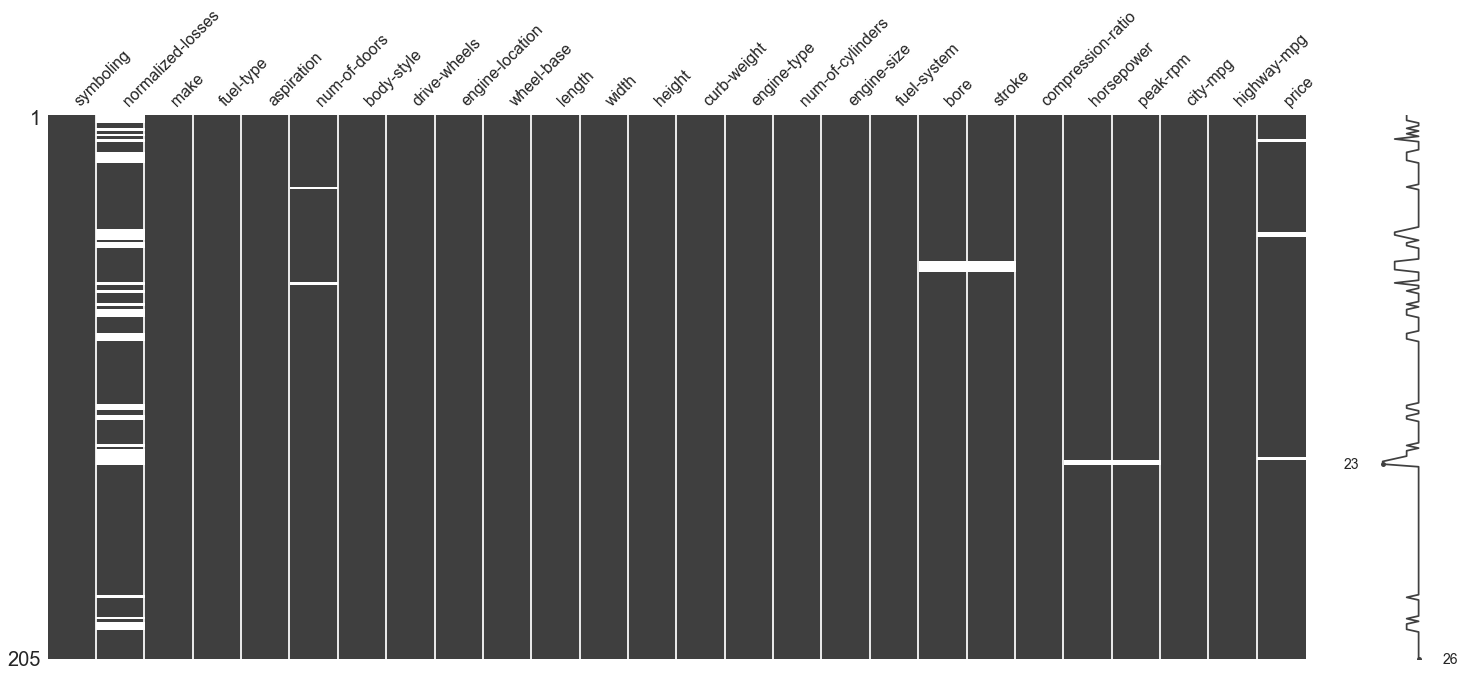

In [25]:
msno.matrix(car_Data)

From the above plot, we can see that column normalized_losses has the maximum missing values

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

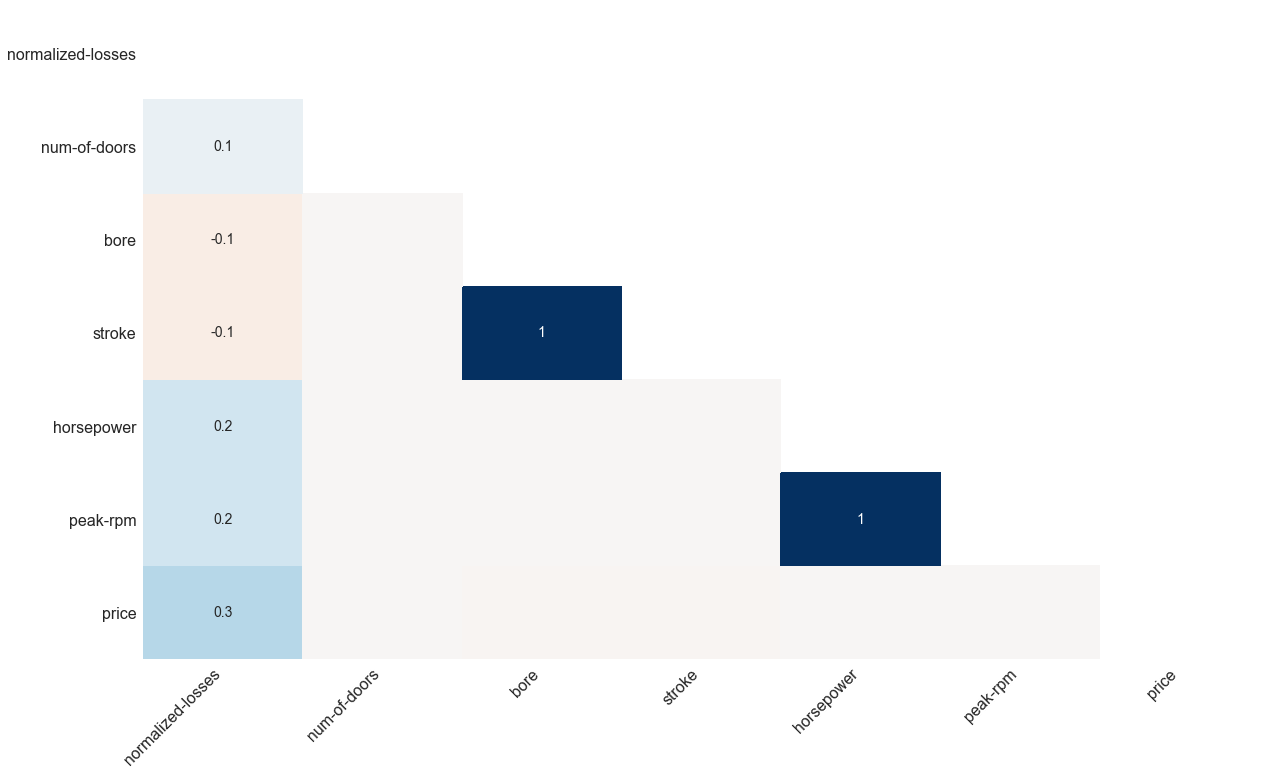

In [26]:
msno.heatmap(car_Data)

There seems to be high correlation of missing values between stroke & bore and horsepower & peak-rpm. 

Need to convert the following data types to its appropriate type :
* symboling to object/category
* normalized-losses to int/float
* bore, stroke, horsepower, peak-rpm and price to continous

In [123]:
car_Data['symboling'] = car_Data['symboling'].astype('object')
for column in ['normalized-losses','bore','stroke','peak-rpm','price','horsepower']:
    car_Data[column] = car_Data[column].astype('float')

In [10]:
car_Data.dtypes

symboling            object 
normalized-losses    float64
make                 object 
fuel-type            object 
aspiration           object 
num-of-doors         object 
body-style           object 
drive-wheels         object 
engine-location      object 
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          int64  
engine-type          object 
num-of-cylinders     object 
engine-size          int64  
fuel-system          object 
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             int64  
highway-mpg          int64  
price                float64
dtype: object

### Exploratory Data Analysis

#### Univariate Analysis

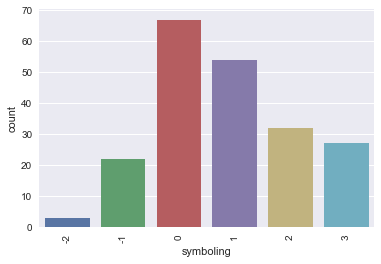

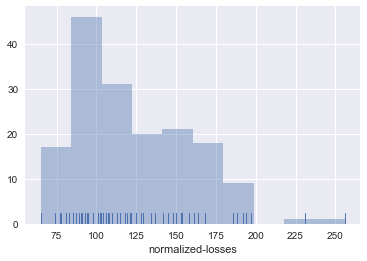

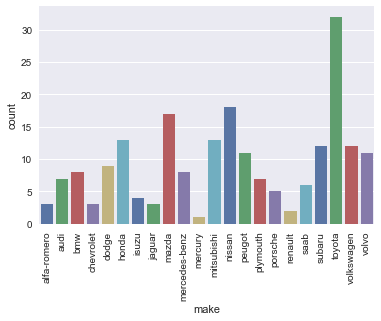

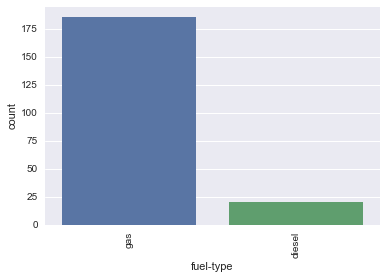

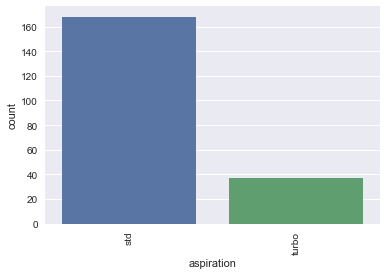

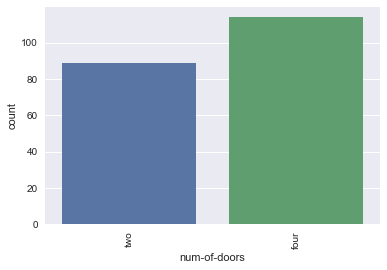

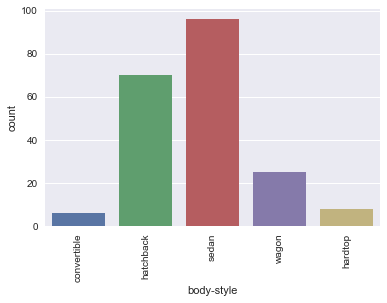

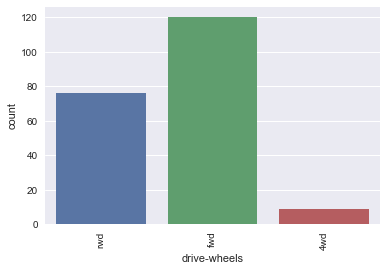

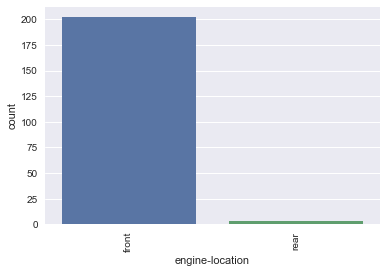

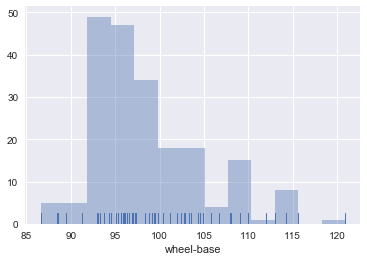

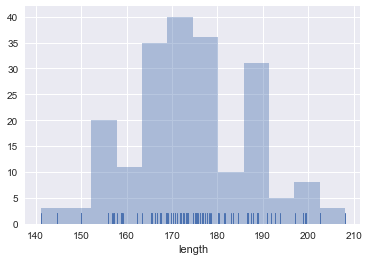

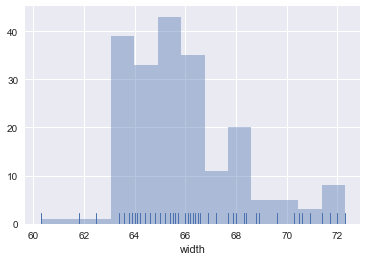

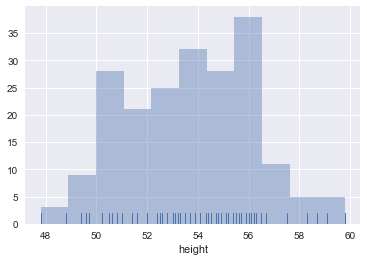

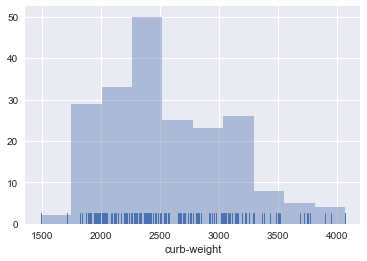

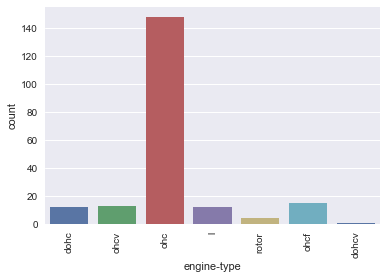

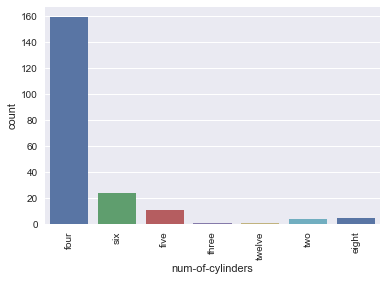

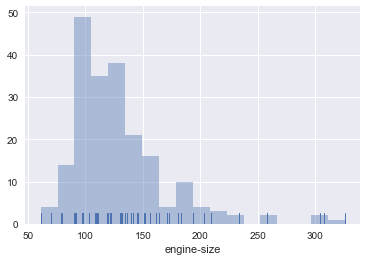

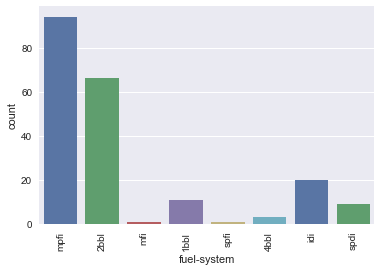

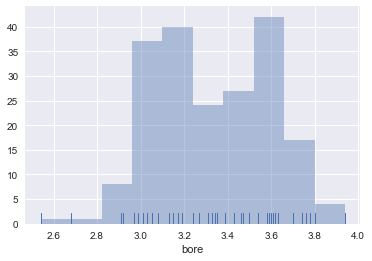

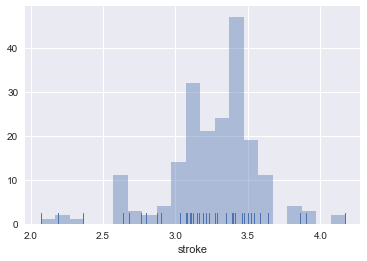

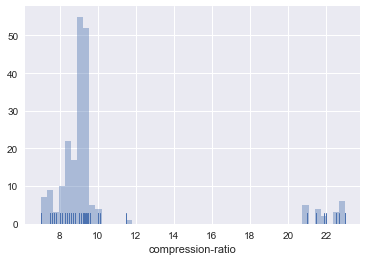

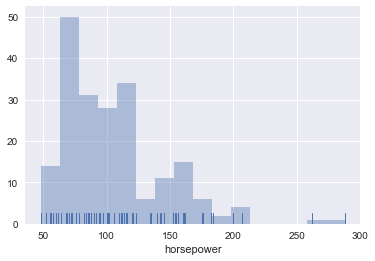

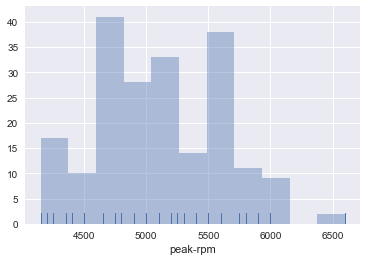

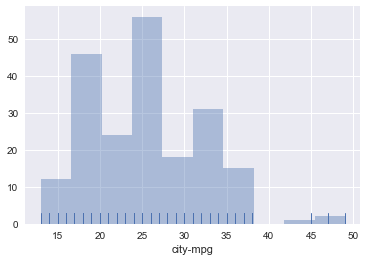

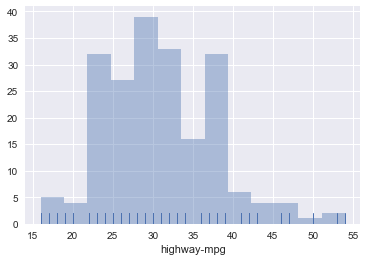

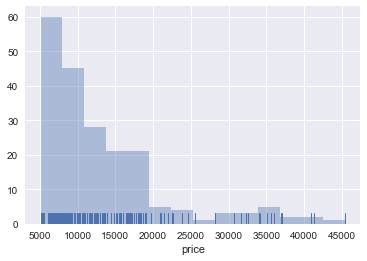

In [29]:
for column in car_Data.columns:
    if car_Data[column].dtype in (['int64','float64']):
        sns.distplot(car_Data[column].dropna(), kde=False, rug=True)
        plt.show()
    else:
        sns.countplot(car_Data[column] ,palette="deep")
        plt.xticks(rotation = 90)
        plt.show()

Analysis from the above plots :
1. Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
2. Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
3. For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
4. Curb weight of the cars are distributed between 1500 and 4000 approximately
5. Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
6. Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

#### Bi-Variate Analysis

Numerical VS Numerical Features

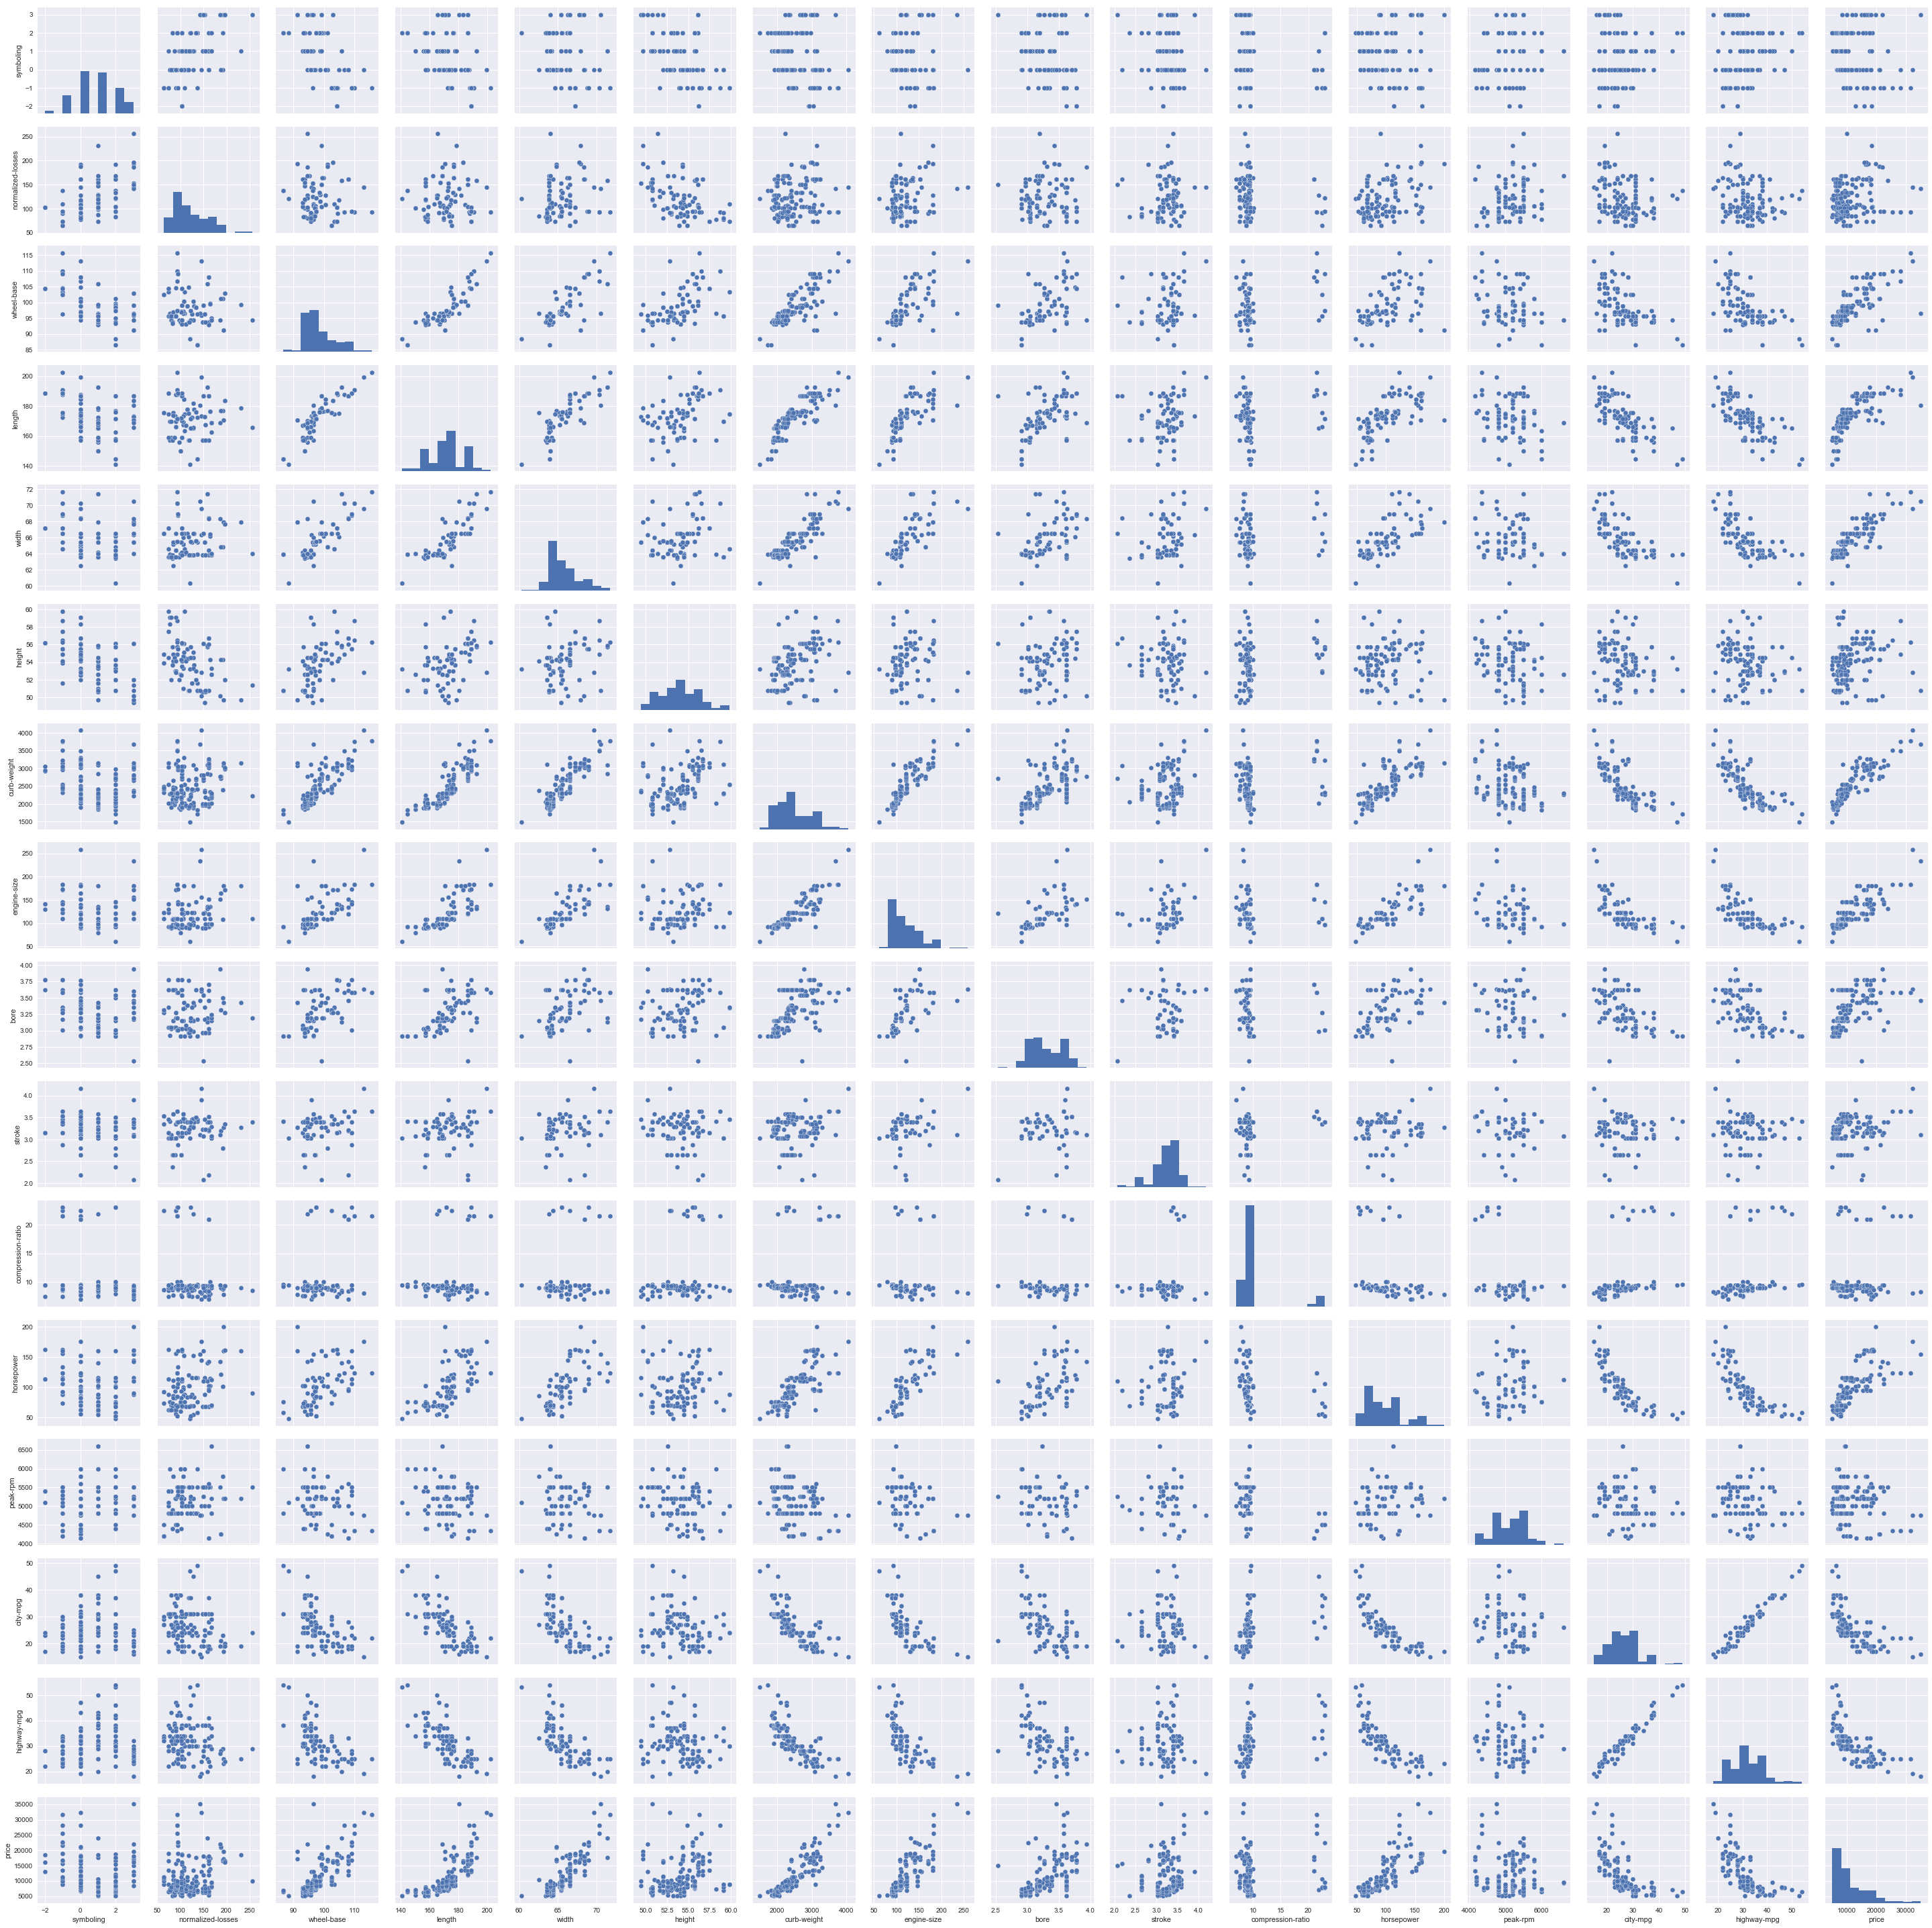

In [31]:
sns.pairplot(car_Data.dropna())

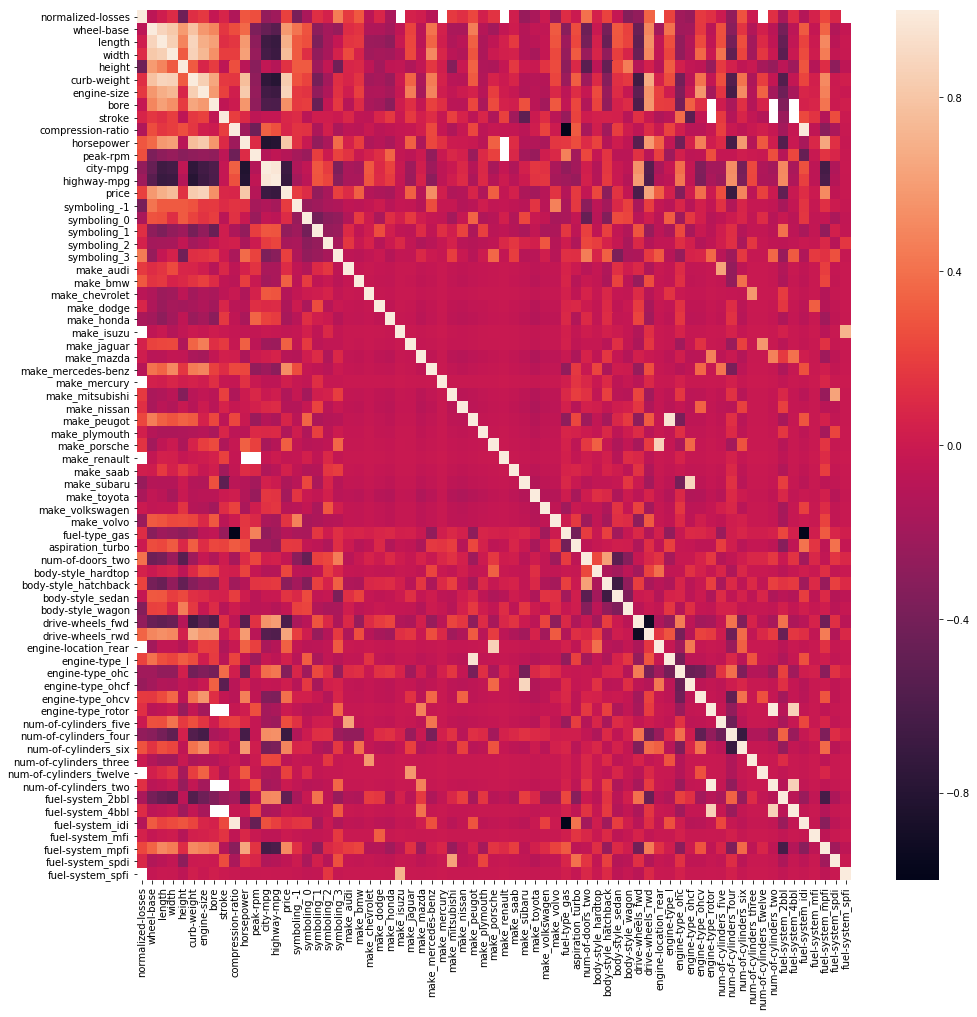

In [270]:
plt.figure(figsize=(16,16))
sns.heatmap(car_Data.corr())
plt.show()

Categorical VS Categorical Features

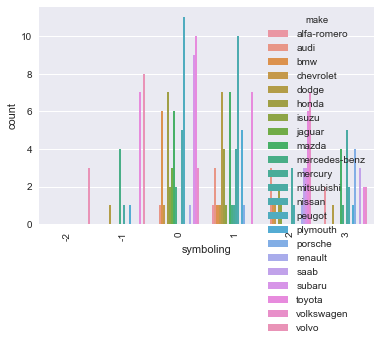

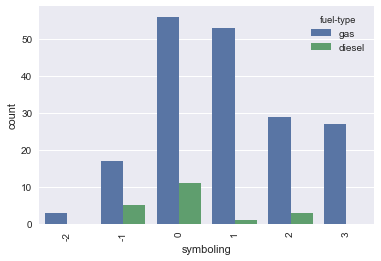

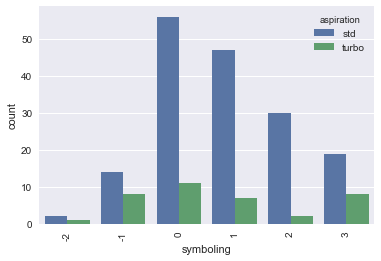

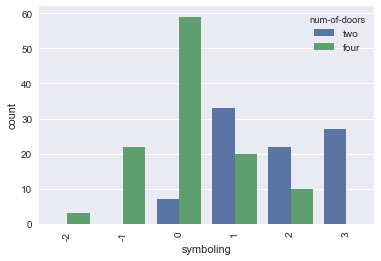

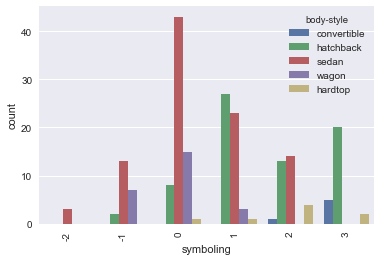

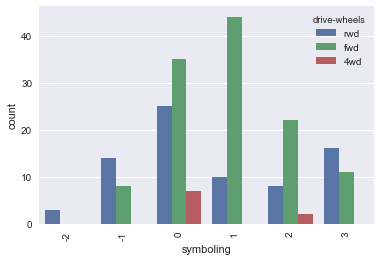

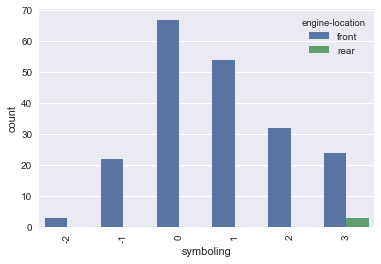

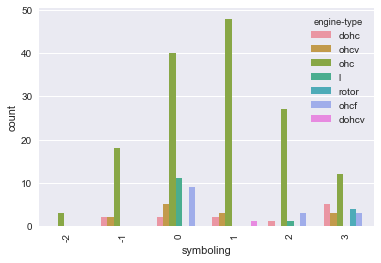

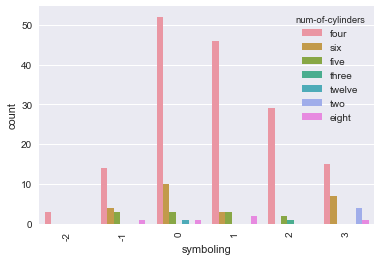

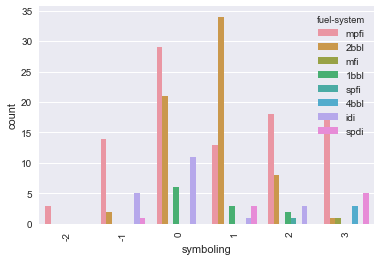

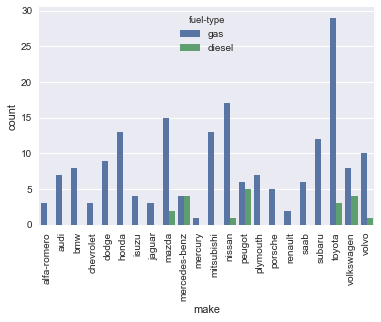

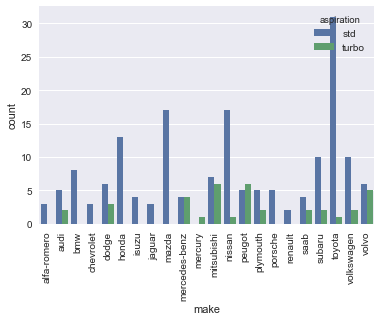

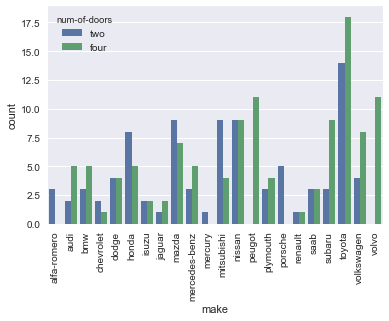

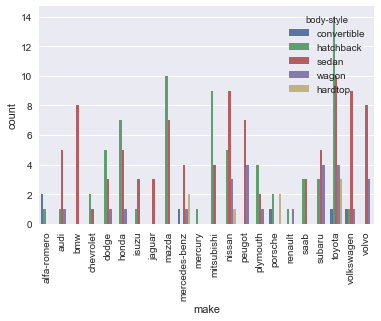

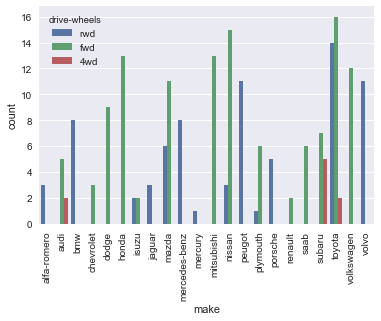

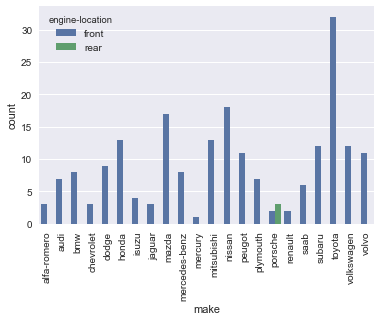

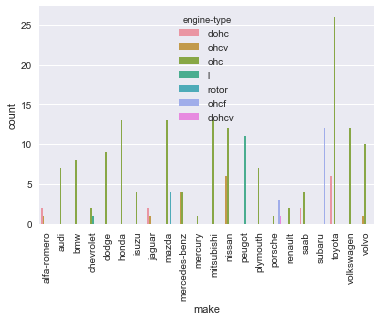

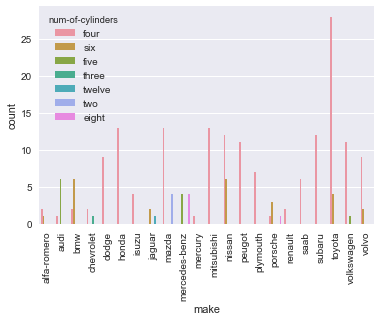

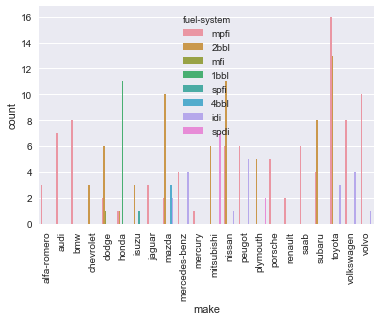

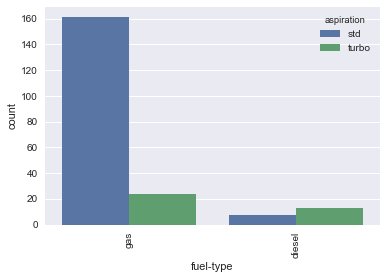

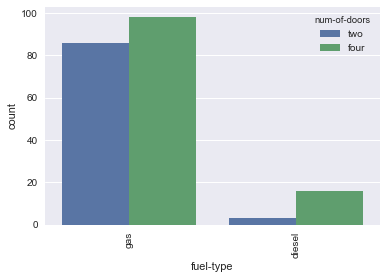

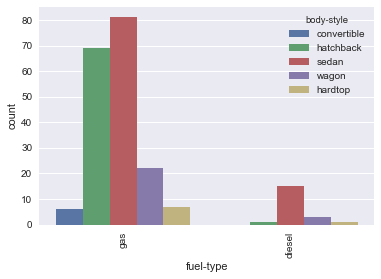

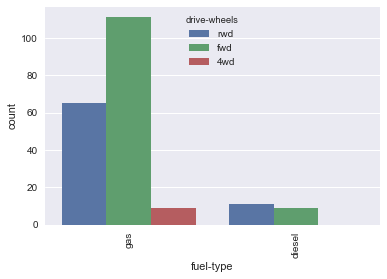

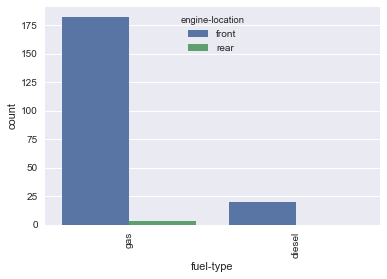

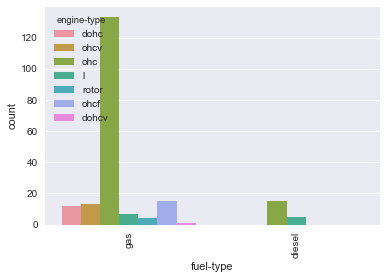

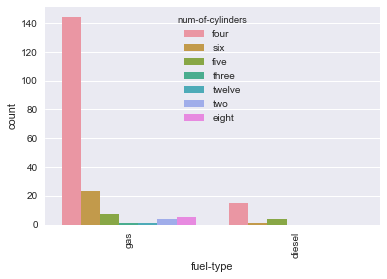

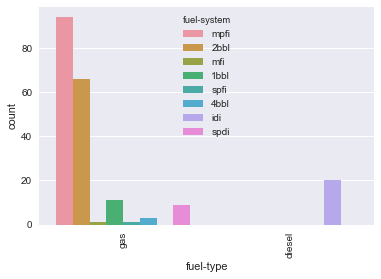

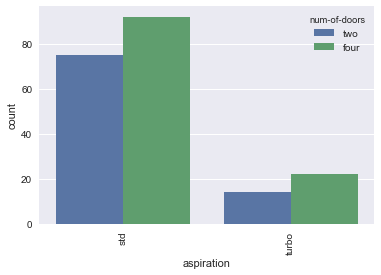

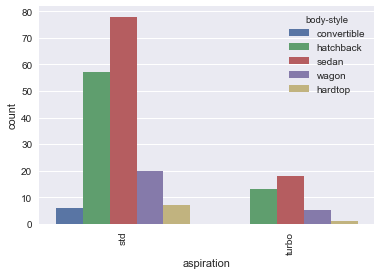

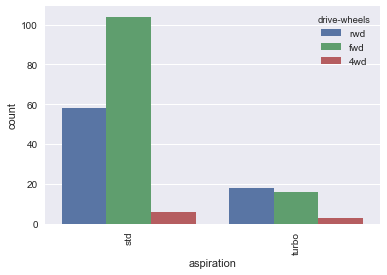

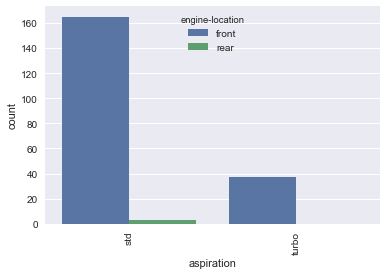

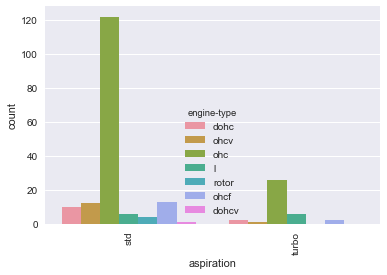

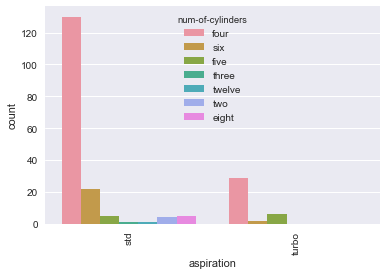

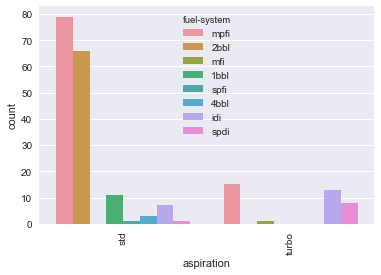

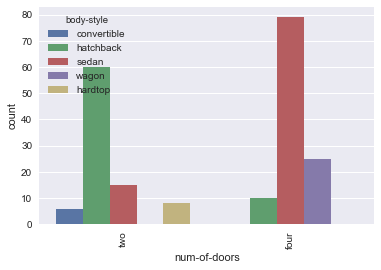

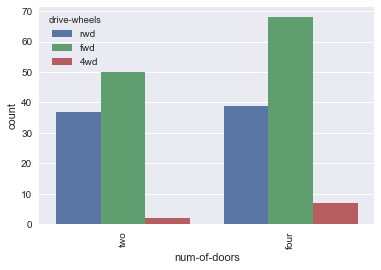

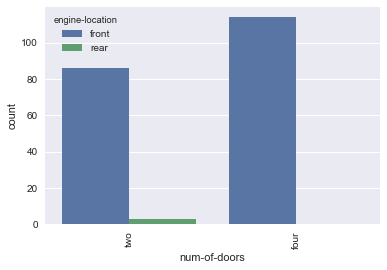

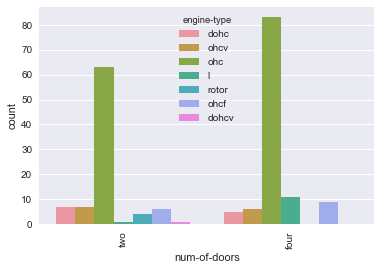

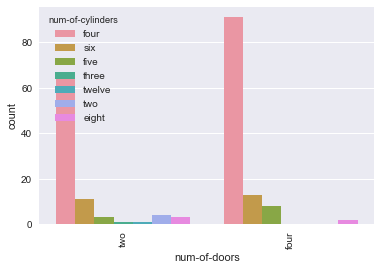

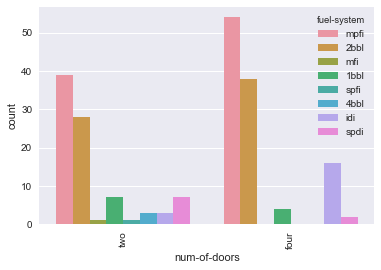

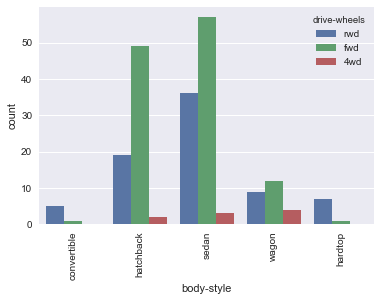

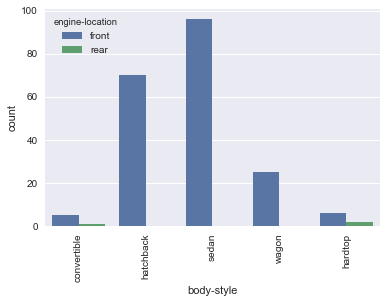

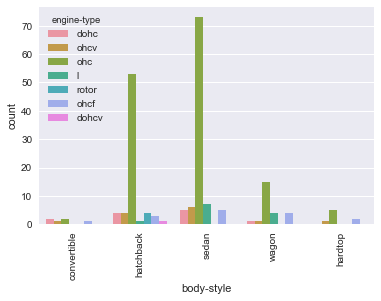

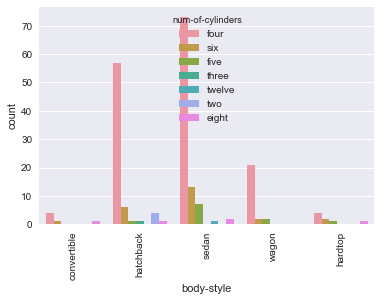

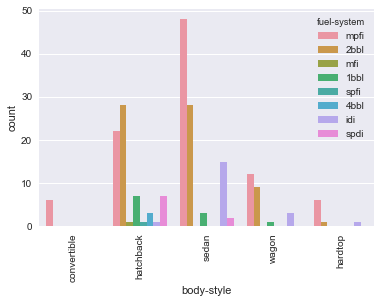

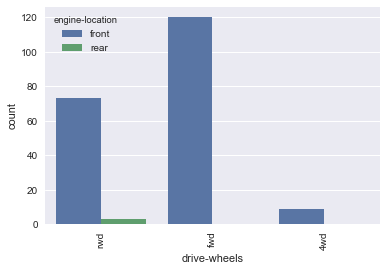

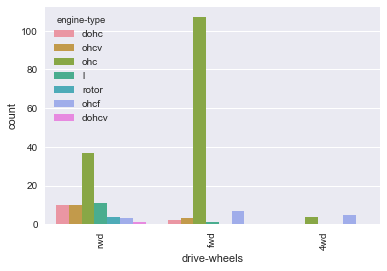

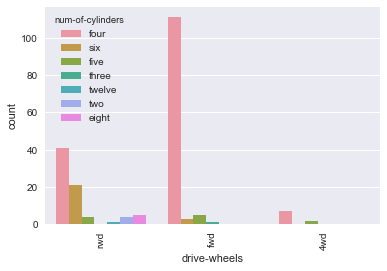

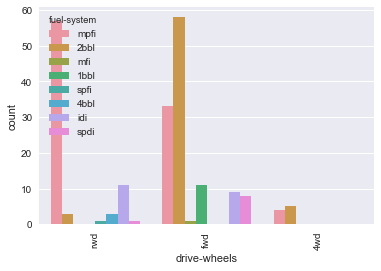

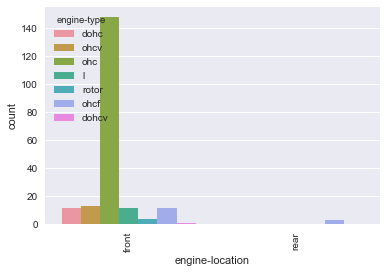

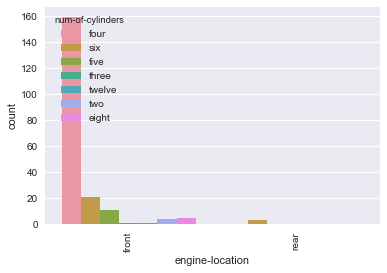

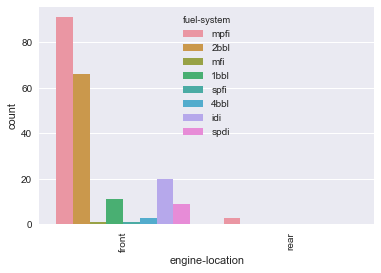

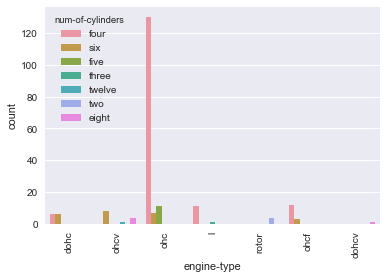

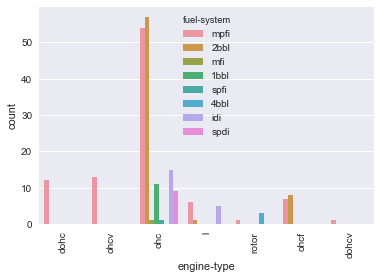

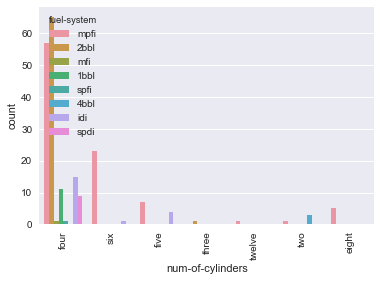

In [43]:
cat_Cols = car_Data.select_dtypes(include=['object']).columns
cat_Cols_Groups = list(itertools.combinations(cat_Cols, 2))
for group in cat_Cols_Groups:
    sns.countplot(x = group[0], hue=group[1], data=car_Data)
    plt.xticks(rotation = 90)
    plt.show()

Categorical VS Numerical 

* Symboling vs Numeric Features
* Price vs Categorical Features
* Normalized_loss vs Categorical Features

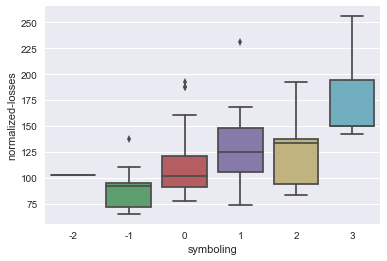

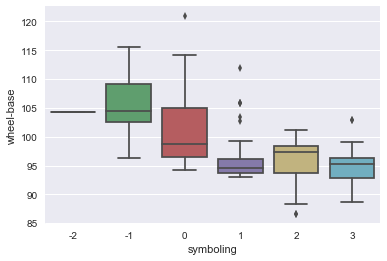

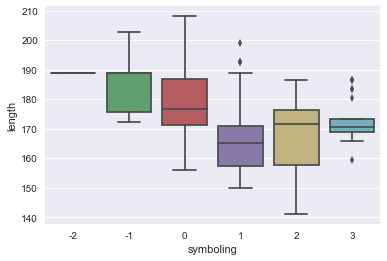

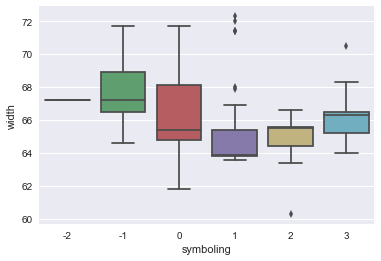

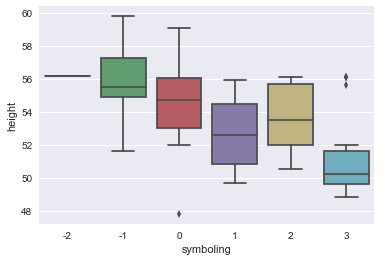

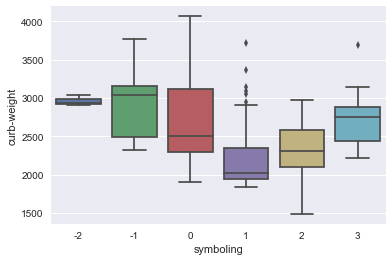

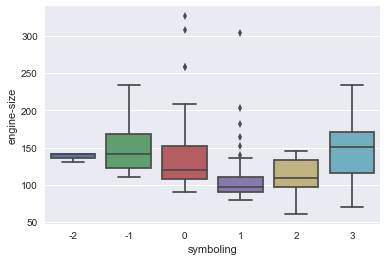

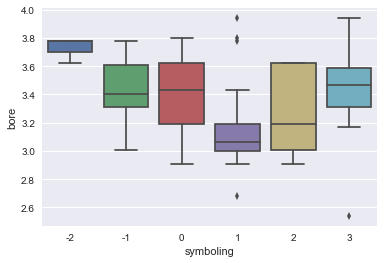

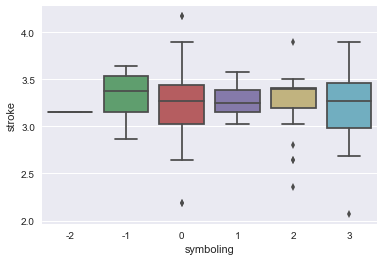

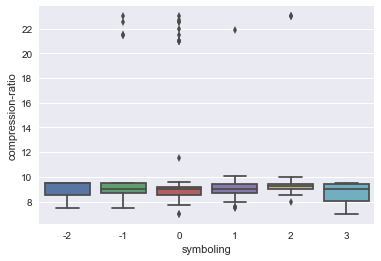

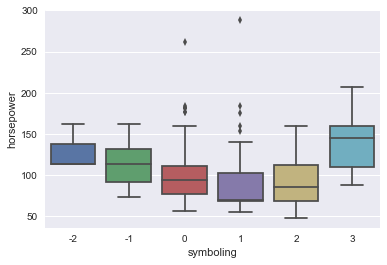

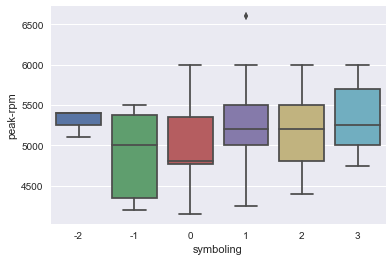

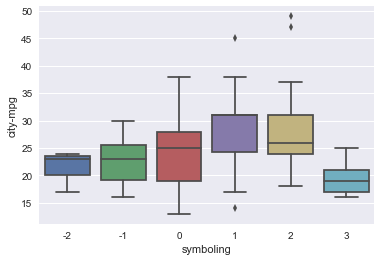

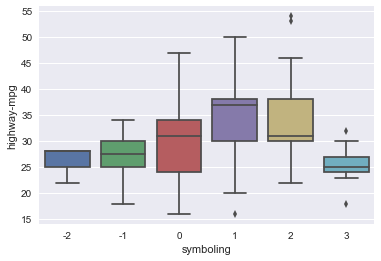

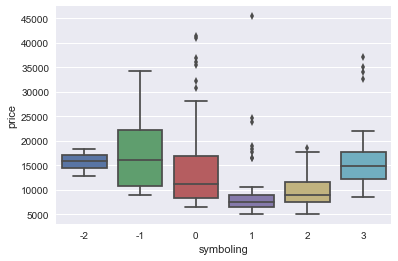

In [44]:
for column in car_Data.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(x = 'symboling', y= column, data = car_Data)
    plt.show()

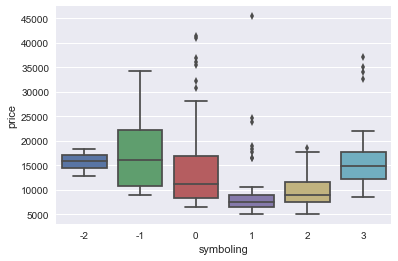

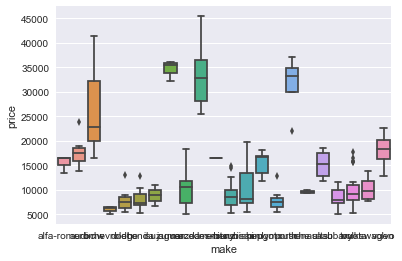

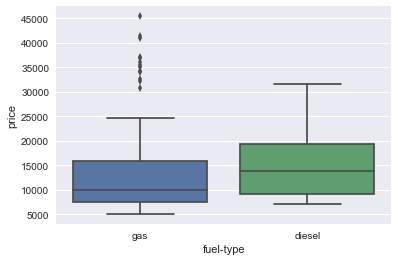

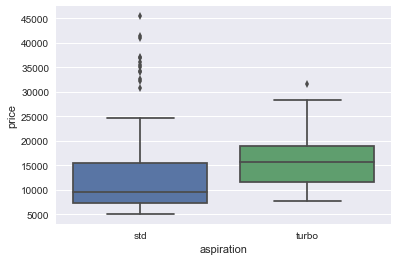

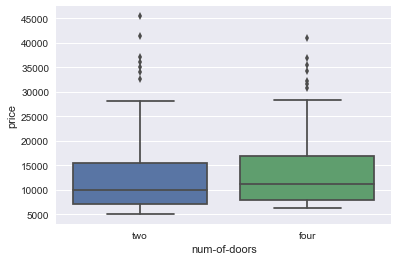

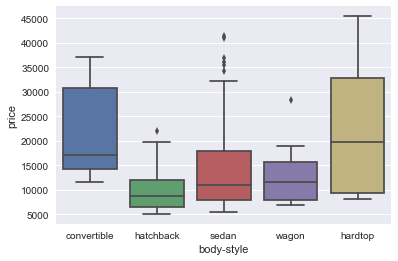

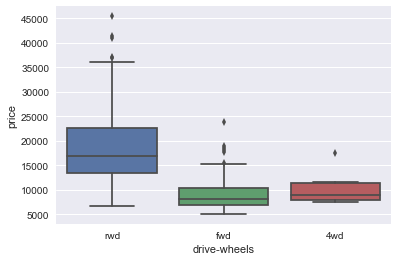

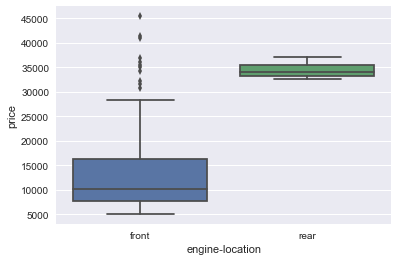

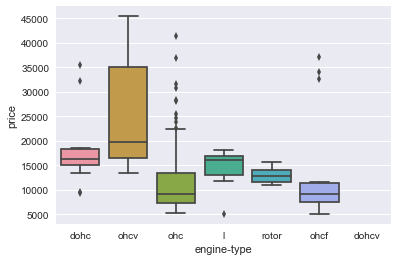

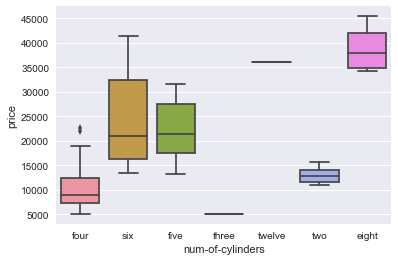

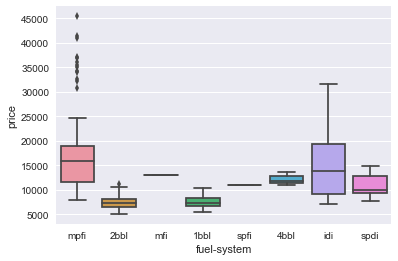

In [46]:
for column in car_Data.select_dtypes(include=['object']).columns:
    sns.boxplot(x = column, y= 'price', data = car_Data)
    plt.show()

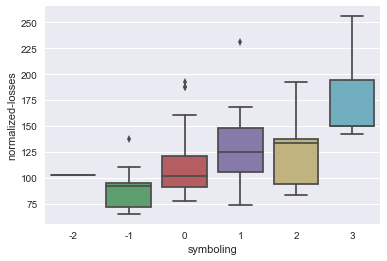

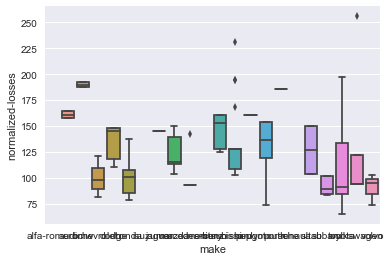

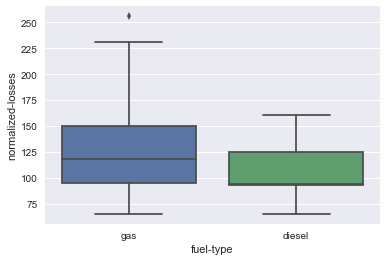

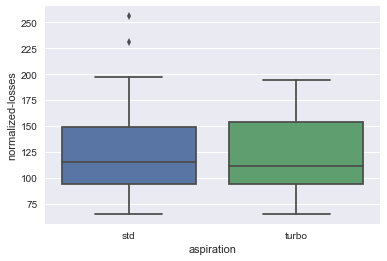

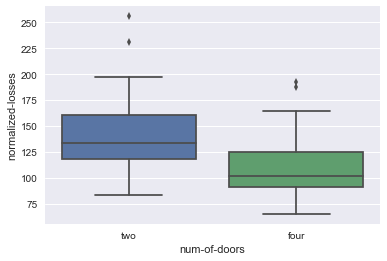

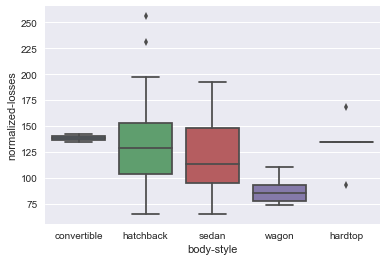

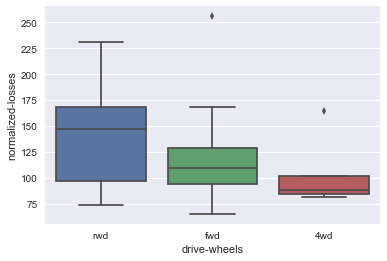

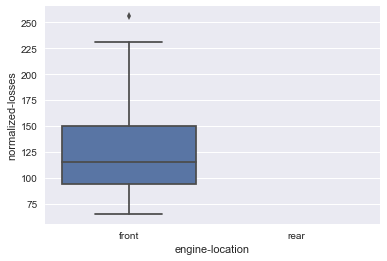

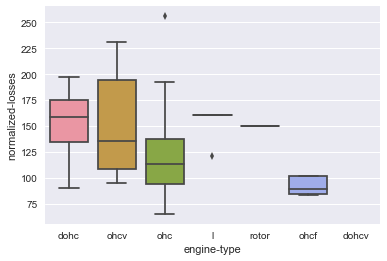

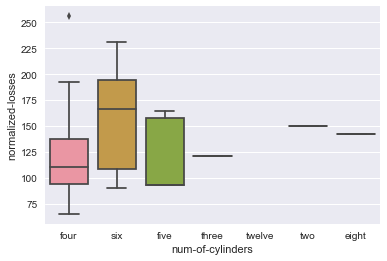

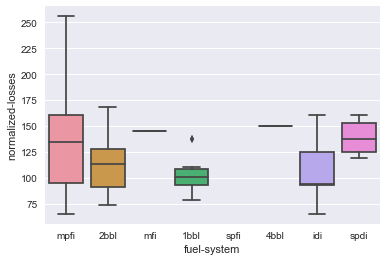

In [48]:
for column in car_Data.select_dtypes(include=['object']).columns:
    sns.boxplot(x = column, y= 'normalized-losses', data = car_Data)
    plt.show()

#### Data Prepration for Model Building

Preprocessing to be done :
1. Convert categorical variables to numeric variables
2. Impute missing values
3. Scaling the features

In [124]:
# Convert categorical variables to numeric variables
cols_to_transform = car_Data.select_dtypes(include=['object']).columns
car_Data = pd.get_dummies(columns=cols_to_transform, data=car_Data, prefix=cols_to_transform, prefix_sep='_', drop_first=True)

In [125]:
cols = car_Data.columns
print(cols)

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_gas', 'aspiration_turbo', 'num-of-doors_two',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_rear', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
 

In [126]:
car_Data.head()

normalized-losses  wheel-base  length  width  height  curb-weight  \
0 NaN                 88.6        168.8   64.1   48.8    2548          
1 NaN                 88.6        168.8   64.1   48.8    2548          
2 NaN                 94.5        171.2   65.5   52.4    2823          
3  164.0              99.8        176.6   66.2   54.3    2337          
4  164.0              99.4        176.6   66.4   54.3    2824          

   engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0  130          3.47  2.68    9.0                111.0       5000.0     
1  130          3.47  2.68    9.0                111.0       5000.0     
2  152          2.68  3.47    9.0                154.0       5000.0     
3  109          3.19  3.40    10.0               102.0       5500.0     
4  136          3.19  3.40    8.0                115.0       5500.0     

   city-mpg  highway-mpg    price  symboling_-1  symboling_0  symboling_1  \
0  21        27           13495.0  0             0            0             
1  21        27           16500.0  0             0            0             
2  19        26           16500.0  0             0            1             
3  24        30           13950.0  0             0            0             
4  18        22           17450.0  0             0            0             

   symboling_2  symboling_3  make_audi  make_bmw  make_chevrolet  make_dodge  \
0  0            1            0          0         0               0            
1  0            1            0          0         0               0            
2  0            0            0          0         0               0            
3  1            0            1          0         0               0            
4  1            0            1          0         0               0            

   make_honda  make_isuzu  make_jaguar  make_mazda  make_mercedes-benz  \
0  0           0           0            0           0                    
1  0           0           0            0           0                    
2  0           0           0            0           0                    
3  0           0           0            0           0                    
4  0           0           0            0           0                    

   make_mercury  make_mitsubishi  make_nissan  make_peugot  make_plymouth  \
0  0             0                0            0            0               
1  0             0                0            0            0               
2  0             0                0            0            0               
3  0             0                0            0            0               
4  0             0                0            0            0               

   make_porsche  make_renault  make_saab  make_subaru  make_toyota  \
0  0             0             0          0            0             
1  0             0             0          0            0             
2  0             0             0          0            0             
3  0             0             0          0            0             
4  0             0             0          0            0             

   make_volkswagen  make_volvo  fuel-type_gas  aspiration_turbo  \
0  0                0           1              0                  
1  0                0           1              0                  
2  0                0           1              0                  
3  0                0           1              0                  
4  0                0           1              0                  

   num-of-doors_two  body-style_hardtop  body-style_hatchback  \
0  1                 0                   0                      
1  1                 0                   0                      
2  1                 0                   1                      
3  0                 0                   0                      
4  0                 0                   0                      

   body-style_sedan  body-style_wagon  drive-wheels_fwd  drive-w

In [127]:

car_Data_Imputed = pd.DataFrame(KNN(3).fit_transform(car_Data))

Imputing row 1/201 with 1 missing, elapsed time: 0.047
Imputing row 101/201 with 0 missing, elapsed time: 0.049
Imputing row 201/201 with 0 missing, elapsed time: 0.051


In [128]:
car_Data_Imputed.columns = cols

In [129]:
# Checking for nulls
car_Data_Imputed.isnull().sum()

normalized-losses          0
wheel-base                 0
length                     0
width                      0
height                     0
curb-weight                0
engine-size                0
bore                       0
stroke                     0
compression-ratio          0
horsepower                 0
peak-rpm                   0
city-mpg                   0
highway-mpg                0
price                      0
symboling_-1               0
symboling_0                0
symboling_1                0
symboling_2                0
symboling_3                0
make_audi                  0
make_bmw                   0
make_chevrolet             0
make_dodge                 0
make_honda                 0
make_isuzu                 0
make_jaguar                0
make_mazda                 0
make_mercedes-benz         0
make_mercury               0
make_mitsubishi            0
make_nissan                0
make_peugot                0
make_plymouth              0
make_porsche  

In [248]:
cols_to_transform

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system'],
      dtype='object')

In [249]:
# Scaling the features
num_Cols = [x for x in car_Data_Imputed.columns if x not in ['symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault', 'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas','aspiration_turbo', 'num-of-doors_two', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear', 'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor', 'num-of-cylinders_five', 'num-of-cylinders_four', 'num-of-cylinders_six', 'num-of-cylinders_three', 'num-of-cylinders_twelve', 'num-of-cylinders_two', 'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi']]
cat_Cols = ['symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault', 'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas','aspiration_turbo', 'num-of-doors_two', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear', 'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor', 'num-of-cylinders_five', 'num-of-cylinders_four', 'num-of-cylinders_six', 'num-of-cylinders_three', 'num-of-cylinders_twelve', 'num-of-cylinders_two', 'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi']
scaler = StandardScaler()
price = car_Data_Imputed.price
car_Num_Data = car_Data_Imputed[num_Cols]
car_Cat_Data = car_Data_Imputed[cat_Cols]
car_Data_Scaled = pd.DataFrame(scaler.fit_transform(car_Num_Data))
car_Data_Scaled.columns = num_Cols

In [251]:
car_Data_Scaled = pd.concat([car_Data_Scaled, car_Cat_Data], axis=1)

#car_Data_Scaled.columns = cols
car_Data_Scaled['price'] = price

In [252]:
car_Data_Scaled.head()

normalized-losses  wheel-base    length     width    height  curb-weight  \
0  0.084080          -1.685107   -0.439409 -0.853460 -2.034081 -0.014858      
1  0.960973          -1.685107   -0.439409 -0.853460 -2.034081 -0.014858      
2  1.251693          -0.710103   -0.244152 -0.185597 -0.559713  0.518080      
3  1.226251           0.165748    0.195176  0.148335  0.218425 -0.423766      
4  1.226251           0.099646    0.195176  0.243744  0.218425  0.520017      

   engine-size      bore    stroke  compression-ratio  horsepower  peak-rpm  \
0  0.075389     0.526109 -1.830622 -0.291435           0.203141   -0.244878   
1  0.075389     0.526109 -1.830622 -0.291435           0.203141   -0.244878   
2  0.606234    -2.422443  0.667260 -0.291435           1.356765   -0.244878   
3 -0.431327    -0.518948  0.445929 -0.041121          -0.038315    0.801949   
4  0.220165    -0.518948  0.445929 -0.541748           0.310455    0.801949   

   city-mpg  highway-mpg    price  make_audi  symboling_-1  symboling_0  \
0 -0.652249 -0.542288     13495.0 -0.175412   0.0           0.0           
1 -0.652249 -0.542288     16500.0 -0.175412   0.0           0.0           
2 -0.964397 -0.689386     16500.0 -0.175412   0.0           0.0           
3 -0.184027 -0.100993     13950.0  5.700877   0.0           0.0           
4 -1.120471 -1.277779     17450.0  5.700877   0.0           0.0           

   symboling_1  symboling_2  symboling_3  make_bmw  make_chevrolet  \
0  0.0          0.0          1.0          0.0       0.0              
1  0.0          0.0          1.0          0.0       0.0              
2  1.0          0.0          0.0          0.0       0.0              
3  0.0          1.0          0.0          0.0       0.0              
4  0.0          1.0          0.0          0.0       0.0              

   make_dodge  make_honda  make_isuzu  make_jaguar  make_mazda  \
0  0.0         0.0         0.0         0.0          0.0          
1  0.0         0.0         0.0         0.0          0.0          
2  0.0         0.0         0.0         0.0          0.0          
3  0.0         0.0         0.0         0.0          0.0          
4  0.0         0.0         0.0         0.0          0.0          

   make_mercedes-benz  make_mercury  make_mitsubishi  make_nissan  \
0  0.0                 0.0           0.0              0.0           
1  0.0                 0.0           0.0              0.0           
2  0.0                 0.0           0.0              0.0           
3  0.0                 0.0           0.0              0.0           
4  0.0                 0.0           0.0              0.0           

   make_peugot  make_plymouth  make_porsche  make_renault  make_saab  \
0  0.0          0.0            0.0           0.0           0.0         
1  0.0          0.0            0.0           0.0           0.0         
2  0.0          0.0            0.0           0.0           0.0         
3  0.0          0.0            0.0           0.0           0.0         
4  0.0          0.0            0.0           0.0           0.0         

   make_subaru  make_toyota  make_volkswagen  make_volvo  fuel-type_gas  \
0  0.0          0.0          0.0              0.0         1.0             
1  0.0          0.0          0.0              0.0         1.0             
2  0.0          0.0          0.0              0.0         1.0             
3  0.0          0.0          0.0              0.0         1.0             
4  0.0          0.0          0.0              0.0         1.0             

   aspiration_turbo  num-of-doors_two  body-style_hardtop  \
0  0.0               1.0               0.0                  
1  0.0               1.0               0.0                  
2  0.0               1.0               0.0                  
3  0.0               0.0               0.0                  
4  0.0               0.0               0.0                  

   body-style_hatchback  body-style_sedan  body-style_wagon  drive-wheels_fwd  \
0  0.0                   0.0         

Split the data into Train and Test

In [276]:
X, y = car_Data_Scaled.loc[:, car_Data_Scaled.columns!='price'].values, car_Data_Scaled.loc[:,'price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

Starting with a simple model !!!

#### Linear Regression

In [254]:
linReg = LinearRegression()
# create the RFE model for the svm classifier 
# and select attributes
linear_Model = linReg.fit(X_train, y_train)
y_train_pred = linear_Model.predict(X_train)
y_test_pred = linear_Model.predict(X_test)

##### Error Metrics for Regression

* Mean Absolute Error (MAE):

$$MAE = \dfrac{1}{n}\times|\sum_{i = 1}^{n}y_{i} - \hat{y_{i}}|$$


* Mean Squared Error (MSE):

$$MSE = \dfrac{1}{n}\times(\sum_{i = 1}^{n}y_{i} - \hat{y_{i}})^2$$


* Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\dfrac{1}{n}\times(\sum_{i = 1}^{n}y_{i} - \hat{y_{i}})^2}$$


* Mean Absolute Percentage Error (MAPE):

$$MAPE = \dfrac{100}{n}\times\mid\dfrac{\sum_{i = 1}^{n}y_{i} - \hat{y_{i}}}{y_{i}}\mid$$


In [256]:
print('The Mean absolute error on train data: {} \n'.format(mean_absolute_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute error on test data: {} \n'.format(mean_absolute_error(y_pred = y_test_pred, y_true = y_test)))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('The Mean absolute percentage error on train data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute percentage error on test data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_test_pred, y_true = y_test)))

print('The R2 Score on train data: {} \n'.format(r2_score(y_pred = y_train_pred, y_true = y_train)))
print('The R2 Score on test data: {} \n'.format(r2_score(y_pred = y_test_pred, y_true = y_test)))

The Mean absolute error on train data: 923.3857142857142 

The Mean absolute error on test data: 1586790752436320.5 

The Mean absolute percentage error on train data: 7.898540171762431 

The Mean absolute percentage error on test data: 10259253947171.098 

The R2 Score on train data: 0.9776519573739968 

The R2 Score on test data: -1.1390190813029911e+24 



#### Decision Tree Model using Grid-search

#### Parameters

* max_depth : int or None, optional (default=None)

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [287]:
# set of parameters to test
param_grid = {'max_depth': range(1,11)}

In [288]:
dt = tree.DecisionTreeRegressor()
GS = GridSearchCV(dt, param_grid, cv=10)
GS.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [289]:
GS.best_params_

{'max_depth': 10}

In [291]:
importances = GS.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([car_Data_Scaled.columns[indices],np.sort(importances)[::-1]])

0            1                  2          3           4  \
0  engine-size  curb-weight  normalized-losses  length     bore         
1  0.698564     0.199697     0.0371725          0.0301555  0.00692513   

             5           6           7          8           9          10  \
0  symboling_2  wheel-base  peak-rpm    height     width       horsepower   
1  0.00542743   0.00527648  0.00419824  0.0032319  0.00268592  0.00216314   

              11            12           13           14             15  \
0  fuel-type_gas  symboling_-1  make_saab    city-mpg     engine-type_l   
1  0.00131502     0.000689213   0.000456023  0.000404101  0.000385743     

                 16                17           18                 19  \
0  body-style_wagon  fuel-system_4bbl  highway-mpg  compression-ratio   
1  0.000353115       0.000251991       0.000211959  0.000113074         

            20                  21                22           23  \
0  make_dodge   body-style_hardtop  body-style_sedan  stroke        
1  0.000107692  5.40081e-05         4.16701e-05       3.33514e-05   

                 24           25            26                27           28  \
0  aspiration_turbo  symboling_1  make_mercury  num-of-doors_two  symboling_0   
1  1.6839e-05        1.61359e-05  1.33375e-05   1.21704e-05       1.12725e-05   

            29                       30                    31     32  \
0  make_toyota  num-of-cylinders_twelve  body-style_hatchback  price   
1  9.89964e-06  3.19591e-06              2.48422e-06           0       

            33        34              35           36          37         38  \
0  symboling_3  make_bmw  make_chevrolet  make_jaguar  make_honda  make_audi   
1  0            0         0               0            0           0           

           39                40          41               42               43  \
0  make_isuzu  fuel-system_spdi  make_mazda  engine-type_ohc  fuel-system_mfi   
1  0           0                 0           0                0                 

                44                45                    46  \
0  fuel-system_idi  fuel-system_2bbl  num-of-cylinders_two   
1  0                0                 0                      

                       47                    48                     49  \
0  num-of-cylinders_three  num-of-cylinders_six  num-of-cylinders_four   
1  0                       0                     0                       

                      50                 51                52  \
0  num-of-cylinders_five  engine-type_rotor  engine-type_ohcv   
1  0                      0                  0                  

                 53                    54                  55  \
0  engine-type_ohcf  engine-location_rear  make_mercedes-benz   
1  0                 0                     0                    

                 56                57          58               59  \
0  drive-wheels_rwd  drive-wheels_fwd  make_volvo  make_volkswagen   
1  0                 0                 0           0                 

            60            61            62                63           64  \
0  make_subaru  make_renault  make_porsche  fuel-system_mpfi  make_peugot   
1  0            0             0             0                 0             

            65               66             67  
0  make_nissan  make_mitsubishi  make_plymouth  
1  0            0                0

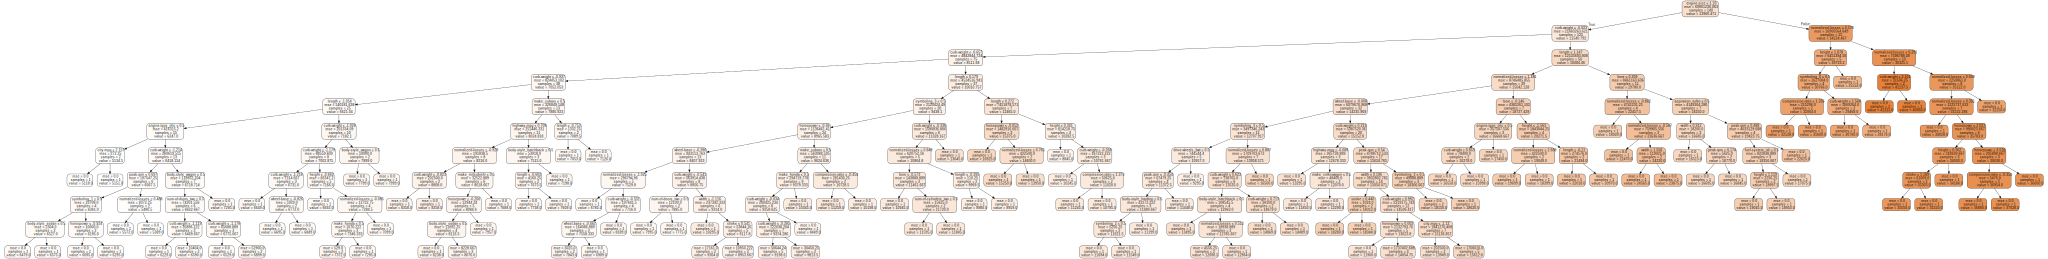

In [292]:

dot_data = tree.export_graphviz(GS.best_estimator_, out_file=None, feature_names=car_Data_Scaled.drop(labels=['price'],axis=1).columns,class_names='price', filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [294]:
y_train_pred = GS.predict(X_train)
y_test_pred = GS.predict(X_test)

In [295]:
print('The Mean absolute error on train data: {} \n'.format(mean_absolute_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute error on test data: {} \n'.format(mean_absolute_error(y_pred = y_test_pred, y_true = y_test)))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('The Mean absolute percentage error on train data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute percentage error on test data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_test_pred, y_true = y_test)))

print('The R2 Score on train data: {} \n'.format(r2_score(y_pred = y_train_pred, y_true = y_train)))
print('The R2 Score on test data: {} \n'.format(r2_score(y_pred = y_test_pred, y_true = y_test)))

The Mean absolute error on train data: 98.25761904761904 

The Mean absolute error on test data: 1540.4240437158471 

The Mean absolute percentage error on train data: 0.7948730018627633 

The Mean absolute percentage error on test data: 13.140648828923112 

The R2 Score on train data: 0.9983218768664412 

The R2 Score on test data: 0.8859327072174835 



After, all the experience as a data scientist, I know that tree based ensembling models like Random Forest, xgboost will perform better in most of the situations as well as keeping the model simple by adding regularization and as well as fast during production by the use of GPU's.

#### Random Forest Model using Grid Search

#### Parameters

* n_estimators : integer, optional (default=10). 
    
    The number of trees in the forest.

* max_depth : integer or None, optional (default=None)

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
* max_features : int, float, string or None, optional (default=”auto”)

    The number of features to consider when looking for the best split.
    
* min_samples_leaf : int, float, optional (default=1)

    The minimum number of samples required to be at a leaf node

In [296]:
# set of parameters to test
param_grid = { 
           "n_estimators" : [250, 300],
           "max_depth" : [1,5,10],
            "max_features" : [3, 5],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

In [297]:
rf = RandomForestRegressor()
GS = GridSearchCV(rf, param_grid, cv=10)
GS.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 300], 'max_depth': [1, 5, 10], 'max_features': [3, 5], 'min_samples_leaf': [1, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [298]:
GS.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [299]:
y_train_pred = GS.predict(X_train)
y_test_pred = GS.predict(X_test)

In [300]:
print('The Mean absolute error on train data: {} \n'.format(mean_absolute_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute error on test data: {} \n'.format(mean_absolute_error(y_pred = y_test_pred, y_true = y_test)))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('The Mean absolute percentage error on train data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute percentage error on test data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_test_pred, y_true = y_test)))

print('The R2 Score on train data: {} \n'.format(r2_score(y_pred = y_train_pred, y_true = y_train)))
print('The R2 Score on test data: {} \n'.format(r2_score(y_pred = y_test_pred, y_true = y_test)))

The Mean absolute error on train data: 649.4690236913733 

The Mean absolute error on test data: 1393.9668683756806 

The Mean absolute percentage error on train data: 4.725909207955167 

The Mean absolute percentage error on test data: 11.87752985195947 

The R2 Score on train data: 0.9880114955443672 

The R2 Score on test data: 0.8961163764112643 



#### Xgboost Model

In [257]:
def runXGB(train_X, train_y, test_X, test_y=None):
        params = {}
        params["objective"] = "reg:linear"
        params["eta"] = 0.002
        params["min_child_weight"] = 1
        params["subsample"] = 0.9
        params["colsample_bytree"] = 0.8
        params["silent"] = 1
        params["max_depth"] = 8
        params["seed"] = 1
        plst = list(params.items())
        num_rounds = 2500

        xgtrain = xgb.DMatrix(train_X, label=train_y, feature_names=cols[cols!='price'])
        xgtest = xgb.DMatrix(test_X, feature_names=cols[cols!='price'])
        model = xgb.train(plst, xgtrain, num_rounds)
        pred_test_y = model.predict(xgtest)
        return pred_test_y, model

In [258]:
y_train_pred, model = runXGB(np.array(X_train), y_train, np.array(X_train))
y_test_pred, model = runXGB(np.array(X_train), y_train, np.array(X_test))

In [259]:
print('The Mean absolute error on train data: {} \n'.format(mean_absolute_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute error on test data: {} \n'.format(mean_absolute_error(y_pred = y_test_pred, y_true = y_test)))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('The Mean absolute percentage error on train data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute percentage error on test data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_test_pred, y_true = y_test)))

print('The R2 Score on train data: {} \n'.format(r2_score(y_pred = y_train_pred, y_true = y_train)))
print('The R2 Score on test data: {} \n'.format(r2_score(y_pred = y_test_pred, y_true = y_test)))

The Mean absolute error on train data: 267.87432686941963 

The Mean absolute error on test data: 1261.504786757172 

The Mean absolute percentage error on train data: 1.7895147927975796 

The Mean absolute percentage error on test data: 10.754759611718828 

The R2 Score on train data: 0.99728537315 

The R2 Score on test data: 0.9197314390292222 



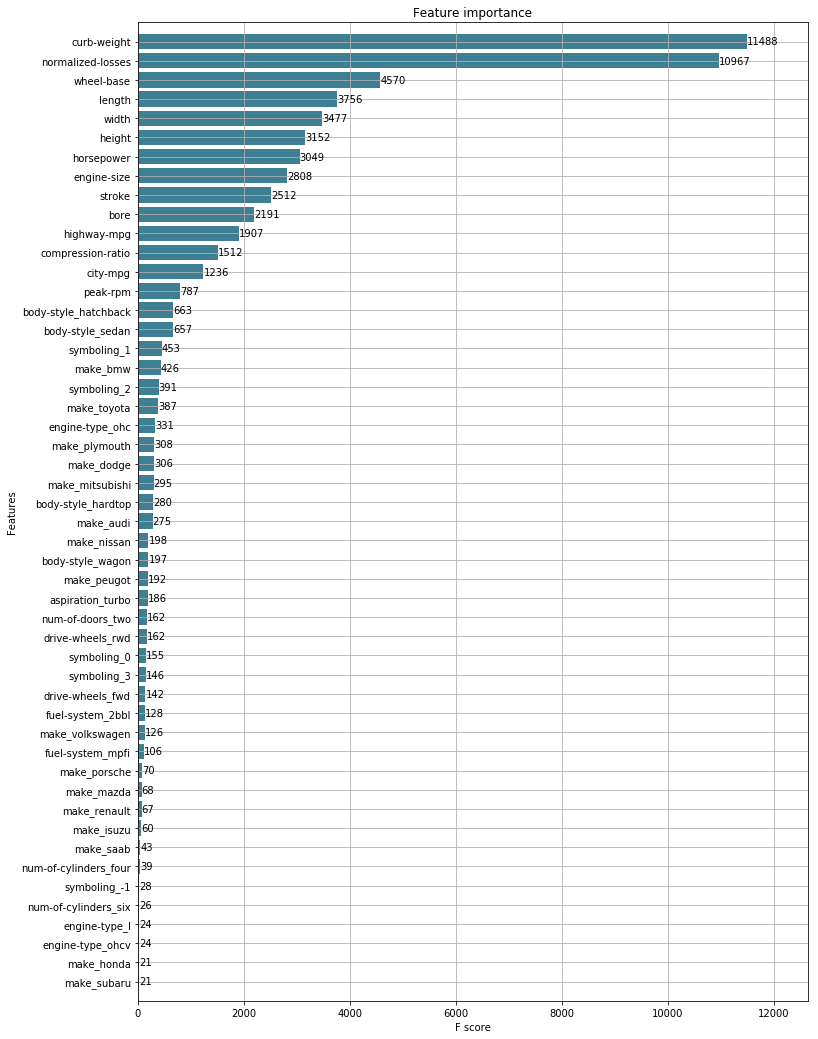

In [260]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

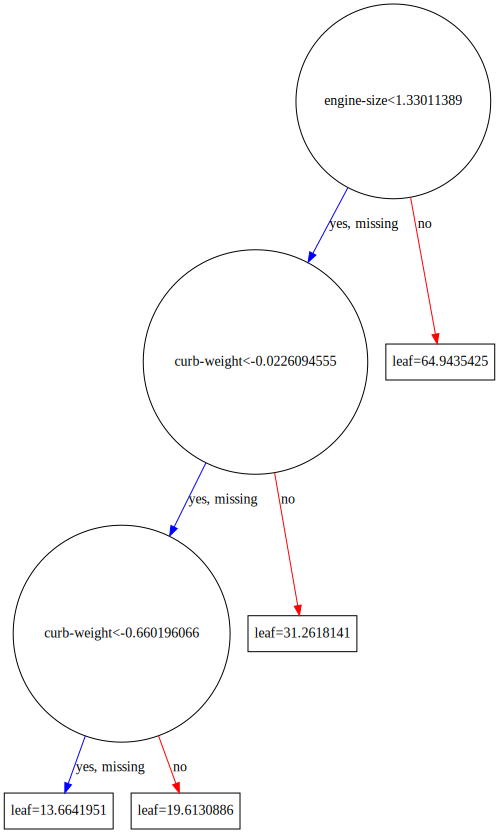

In [261]:
xgb.to_graphviz(model,)

SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods [1-7] and representing the only possible consistent and locally accurate additive feature attribution method based on expectations (see the SHAP NIPS paper for details).
Link : https://github.com/slundberg/shap

In [204]:
# load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(pd.DataFrame(X_train, columns=cols[cols!='price']))

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], pd.DataFrame(X_train, columns=cols[cols!='price']).iloc[0,:])

C:\Users\KumarM1\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\plots\force.py:155: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\KumarM1\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\shap\\plots\\resources\\bundle.js' mode='r' encoding='utf-8'>
  bundle_data = io.open(bundle_path, encoding="utf-8").read()
C:\Users\KumarM1\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\plots\force.py:157: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\KumarM1\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\shap\\plots\\resources\\logoSmallGray.png'>
  logo_data = base64.b64encode(open(logo_path, "rb").read()).decode('utf-8')


The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

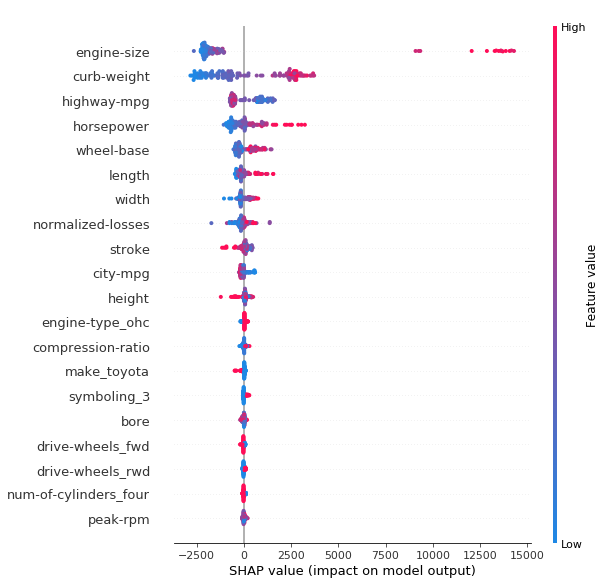

In [208]:
shap.summary_plot(shap_values, pd.DataFrame(X_train, columns=cols[cols!='price']))

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high curb-weight increases the predicted car price.

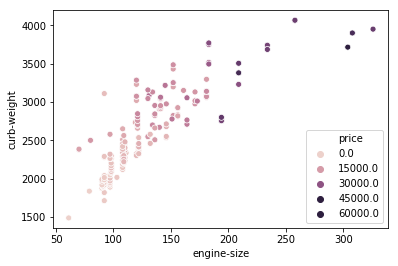

In [193]:
sns.scatterplot(car_Data['engine-size'], car_Data['curb-weight'], hue=car_Data['price'])

Using the above plots, we can infer that the price of a car can be predicted just by using the curb-weight and engine-size with less error.

We can remove insurance-related features like symbolling and normalized-losses in predicting the price of a car. In-turn, we can use price, symboling and normalized-losses to buy a car from a seller.

##### Building a regression model to predict the normalized-losses

Split the data into Train and Test

In [262]:
X, y = car_Data_Scaled.loc[:, [x for x in car_Data_Scaled.columns if x not in ['normalized-losses','price','symboling_-1','symboling_0', 'symboling_1', 'symboling_2','symboling_3']]].values, car_Data_Scaled.loc[:,'normalized-losses'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [263]:
def runXGB(train_X, train_y, test_X, test_y=None):
        params = {}
        params["objective"] = "reg:linear"
        params["eta"] = 0.002
        params["min_child_weight"] = 1
        params["subsample"] = 0.9
        params["colsample_bytree"] = 0.8
        params["silent"] = 1
        params["max_depth"] = 8
        params["seed"] = 1
        plst = list(params.items())
        num_rounds = 2500

        xgtrain = xgb.DMatrix(train_X, label=train_y, feature_names=[x for x in car_Data_Scaled.columns if x not in ['normalized-losses','price','symboling_-1','symboling_0', 'symboling_1', 'symboling_2','symboling_3']])
        xgtest = xgb.DMatrix(test_X, feature_names=[x for x in car_Data_Scaled.columns if x not in ['normalized-losses','price','symboling_-1','symboling_0', 'symboling_1', 'symboling_2','symboling_3']])
        model = xgb.train(plst, xgtrain, num_rounds)
        pred_test_y = model.predict(xgtest)
        return pred_test_y, model

In [264]:
y_train_pred, model = runXGB(np.array(X_train), y_train, np.array(X_train))
y_test_pred, model = runXGB(np.array(X_train), y_train, np.array(X_test))

In [265]:
print('The Mean absolute error on train data: {} \n'.format(mean_absolute_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute error on test data: {} \n'.format(mean_absolute_error(y_pred = y_test_pred, y_true = y_test)))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('The Mean absolute percentage error on train data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute percentage error on test data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_test_pred, y_true = y_test)))

print('The R2 Score on train data: {} \n'.format(r2_score(y_pred = y_train_pred, y_true = y_train)))
print('The R2 Score on test data: {} \n'.format(r2_score(y_pred = y_test_pred, y_true = y_test)))

The Mean absolute error on train data: 0.04406405260419969 

The Mean absolute error on test data: 0.31092898804246344 

The Mean absolute percentage error on train data: 17.349156846202764 

The Mean absolute percentage error on test data: 60.35000328133911 

The R2 Score on train data: 0.9935189283042111 

The R2 Score on test data: 0.8023596164514923 



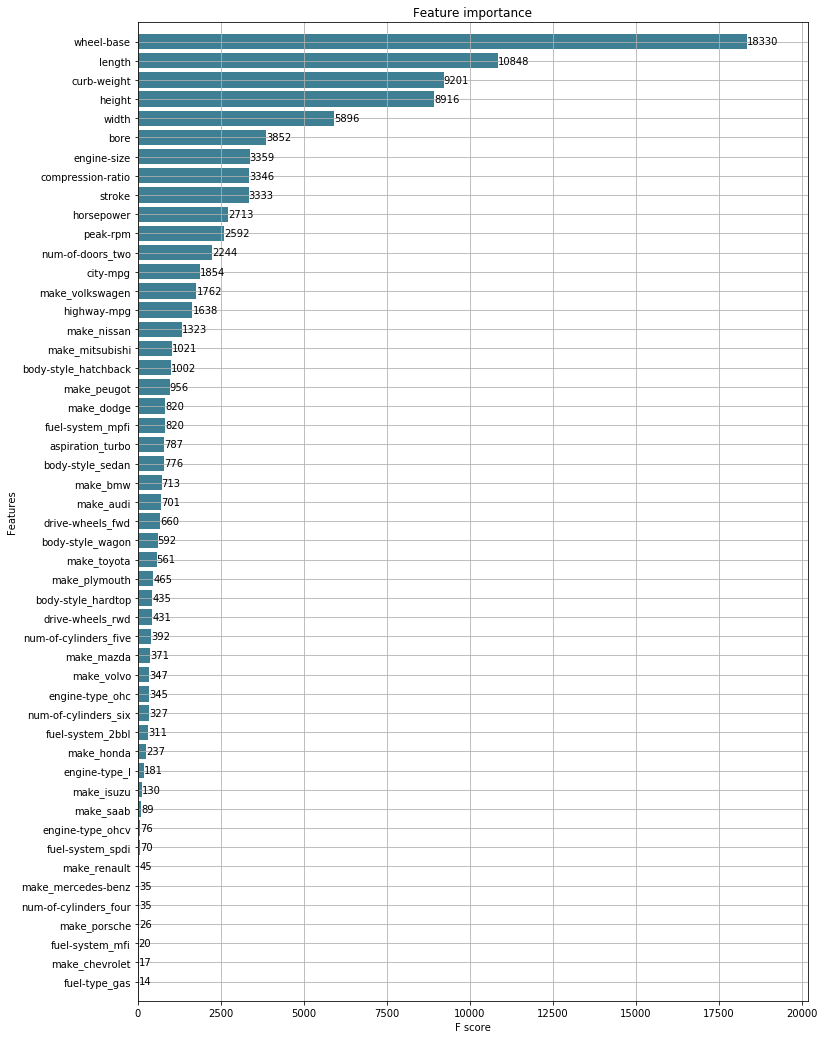

In [266]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

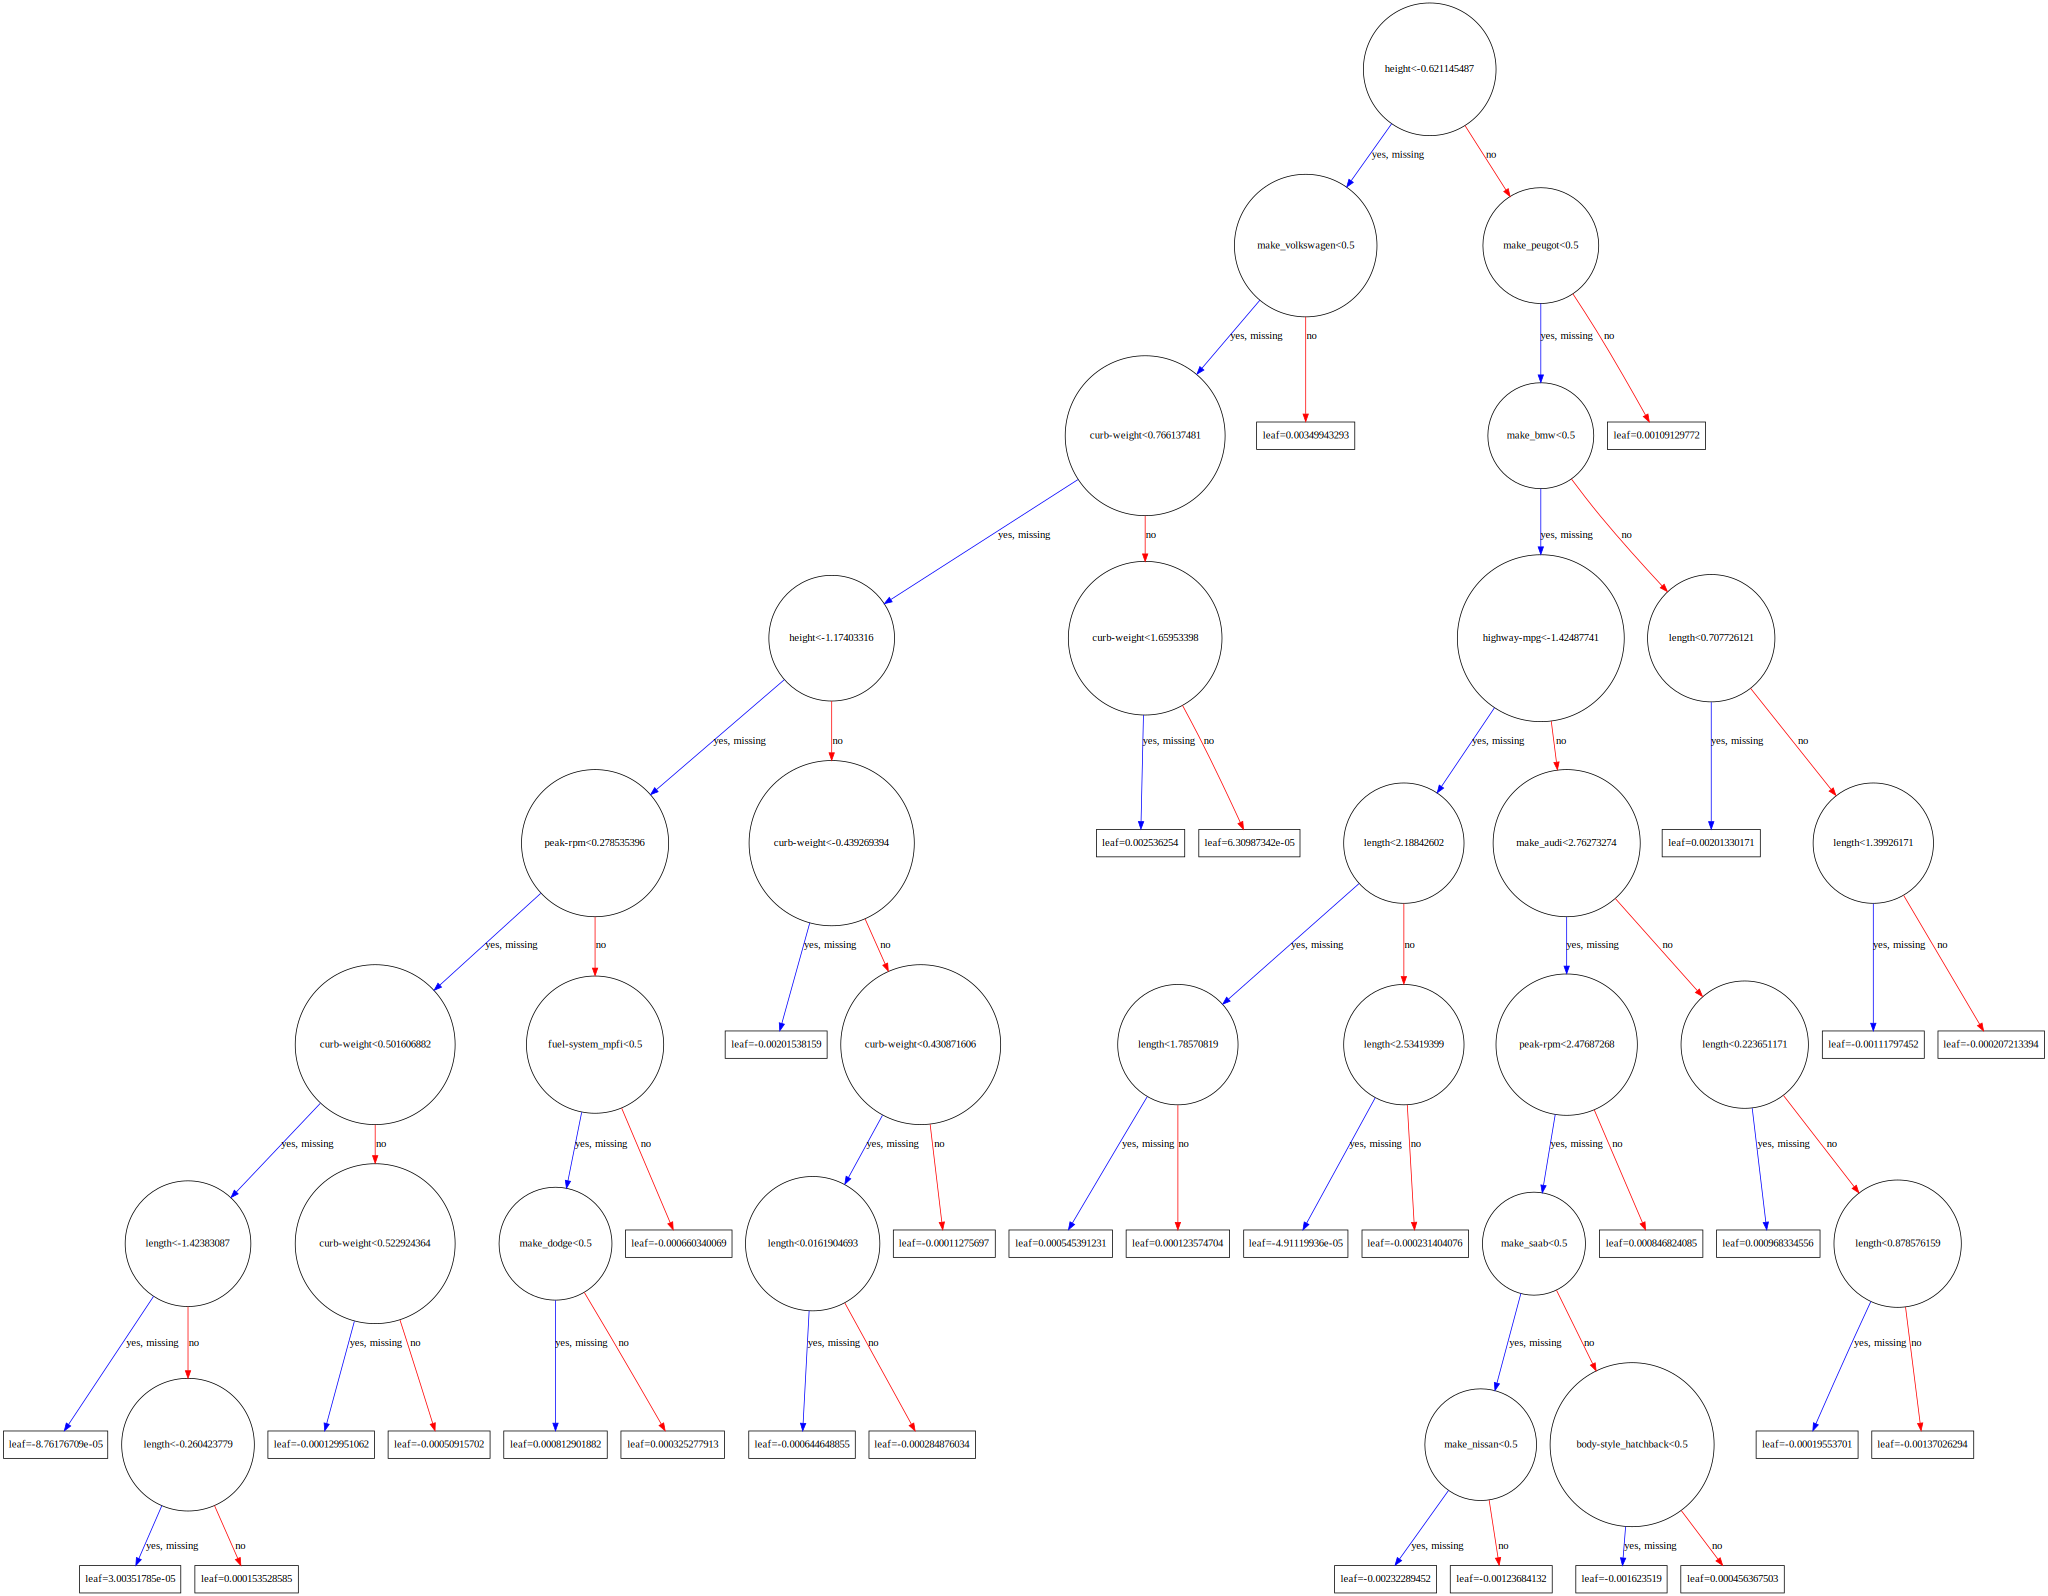

In [267]:
xgb.to_graphviz(model)

In [268]:
# load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(pd.DataFrame(X_train, columns=[x for x in car_Data_Scaled.columns if x not in ['normalized-losses','price','symboling_-1','symboling_0', 'symboling_1', 'symboling_2','symboling_3']]))

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], pd.DataFrame(X_train, columns=[x for x in car_Data_Scaled.columns if x not in ['normalized-losses','price','symboling_-1','symboling_0', 'symboling_1', 'symboling_2','symboling_3']]).iloc[0,:])

C:\Users\KumarM1\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\plots\force.py:155: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\KumarM1\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\shap\\plots\\resources\\bundle.js' mode='r' encoding='utf-8'>
  bundle_data = io.open(bundle_path, encoding="utf-8").read()
C:\Users\KumarM1\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\plots\force.py:157: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\KumarM1\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\shap\\plots\\resources\\logoSmallGray.png'>
  logo_data = base64.b64encode(open(logo_path, "rb").read()).decode('utf-8')


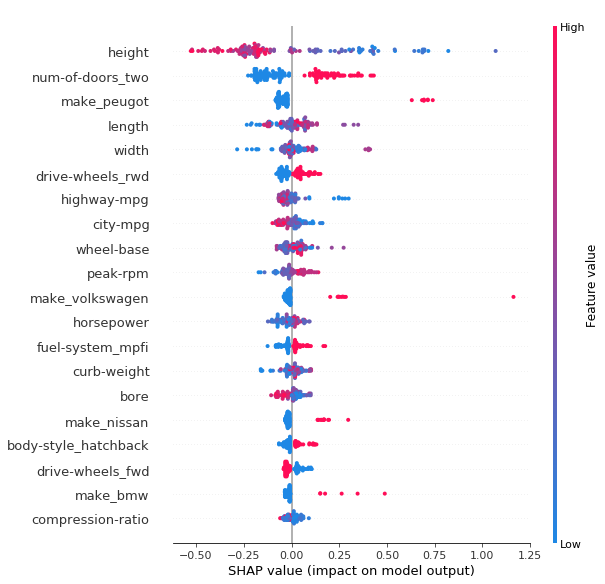

In [269]:
shap.summary_plot(shap_values, pd.DataFrame(X_train, columns=[x for x in car_Data_Scaled.columns if x not in ['normalized-losses','price','symboling_-1','symboling_0', 'symboling_1', 'symboling_2','symboling_3']]))

This reveals that a high height increases the normalized-losses.